In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# -----------------------------------
# 1. Data Generation with Dynamic Yield Trends
# -----------------------------------
# Define districts in South Indian states
states_districts = {
    "Tamil Nadu": ["Ariyalur", "Chennai", "Coimbatore", "Cuddalore", "Dharmapuri", "Dindigul", "Erode", "Kallakurichi",
                   "Kancheepuram", "Kanyakumari", "Karur", "Krishnagiri", "Madurai", "Mayiladuthurai", "Nagapattinam",
                   "Namakkal", "Nilgiris", "Perambalur", "Pudukkottai", "Ramanathapuram", "Ranipet", "Salem", "Sivaganga",
                   "Tenkasi", "Thanjavur", "Theni", "Thoothukudi", "Tiruchirappalli", "Tirunelveli", "Tirupathur", "Tiruppur",
                   "Tiruvallur", "Tiruvannamalai", "Tiruvarur", "Vellore", "Viluppuram", "Virudhunagar", "Chengalpattu"],
    "Karnataka": ["Bagalkot", "Ballari", "Belagavi", "Bengaluru Rural", "Bengaluru Urban", "Bidar", "Chamarajanagar",
                  "Chikkaballapura", "Chikkamagaluru", "Chitradurga", "Dakshina Kannada", "Davangere", "Dharwad", "Gadag",
                  "Hassan", "Haveri", "Kalaburagi", "Kodagu", "Kolar", "Koppal", "Mandya", "Mysuru", "Raichur", "Ramanagara",
                  "Shivamogga", "Tumakuru", "Udupi", "Uttara Kannada", "Vijayanagara", "Vijayapura", "Yadgir"],
    "Andhra Pradesh": ["Alluri Sitharama Raju", "Anakapalli", "Anantapur", "Annamayya", "Bapatla", "Chittoor", "East Godavari",
                       "Eluru", "Guntur", "Kadapa", "Kakinada", "Konaseema", "Krishna", "Kurnool", "Nandyal", "Nellore", "Palnadu",
                       "Parvathipuram Manyam", "Prakasam", "Sri Balaji", "Sri Sathya Sai", "Srikakulam", "Tirupati", "Visakhapatnam",
                       "Vizianagaram", "West Godavari"],
    "Telangana": ["Adilabad", "Bhadradri Kothagudem", "Hyderabad", "Jagtial", "Jangaon", "Jayashankar Bhupalpally", "Jogulamba Gadwal",
                  "Kamareddy", "Karimnagar", "Khammam", "Kumuram Bheem Asifabad", "Mahabubabad", "Mahbubnagar", "Mancherial",
                  "Medak", "Medchal-Malkajgiri", "Mulugu", "Nagarkurnool", "Nalgonda", "Narayanpet", "Nirmal", "Nizamabad",
                  "Peddapalli", "Rajanna Sircilla", "Rangareddy", "Sangareddy", "Siddipet", "Suryapet", "Vikarabad", "Wanaparthy",
                  "Warangal", "Hanumakonda", "Yadadri Bhuvanagiri"],
    "Kerala": ["Alappuzha", "Ernakulam", "Idukki", "Kannur", "Kasaragod", "Kollam", "Kottayam", "Kozhikode", "Malappuram",
               "Palakkad", "Pathanamthitta", "Thiruvananthapuram", "Thrissur", "Wayanad"]
}

# Define crops and harvest months
crops = ["Rice", "Groundnut", "Sugarcane", "Ragi", "Cotton"]
harvest_months = {"Rice": ["Oct"], "Groundnut": ["Nov"], "Sugarcane": ["Jan"], "Ragi": ["Dec"], "Cotton": ["Feb"]}

# Define soil types by district
soil_types_by_state = {"Tamil Nadu": "Red", "Karnataka": "Black", "Andhra Pradesh": "Alluvial", "Telangana": "Red", "Kerala": "Laterite"}
soil_types = {}
for state, districts in states_districts.items():
    base_soil = soil_types_by_state[state]
    for district in districts:
        if state == "Tamil Nadu" and district in ["Thanjavur", "Nagapattinam", "Tiruvarur", "Cuddalore", "Mayiladuthurai"]:
            soil_types[district] = "Alluvial"
        elif state == "Andhra Pradesh" and district in ["East Godavari", "West Godavari", "Krishna", "Guntur", "Bapatla"]:
            soil_types[district] = "Alluvial"
        elif state == "Kerala" or (state == "Karnataka" and district in ["Udupi", "Dakshina Kannada", "Uttara Kannada", "Kodagu"]):
            soil_types[district] = "Laterite"
        elif state == "Karnataka" or (state == "Telangana" and district in ["Adilabad", "Nizamabad", "Karimnagar", "Warangal"]):
            soil_types[district] = "Black"
        elif state == "Andhra Pradesh" and district in ["Anantapur", "Chittoor", "Kadapa", "Kurnool"]:
            soil_types[district] = "Red"
        else:
            soil_types[district] = base_soil

# Crop-soil compatibility
crop_soil_compatibility = {
    "Rice": ["Alluvial", "Clayey"],
    "Groundnut": ["Red", "Sandy Loam"],
    "Sugarcane": ["Alluvial", "Black"],
    "Ragi": ["Red", "Laterite"],
    "Cotton": ["Black", "Red"]
}

# Soil pH and NPK ranges
soil_ph_ranges = {"Alluvial": (6.0, 7.5), "Clayey": (5.8, 7.0), "Red": (5.5, 6.5), "Black": (6.5, 7.8), "Laterite": (5.0, 6.0), "Sandy Loam": (5.5, 6.8)}
npk_base_ranges = {
    "Rice": {"Alluvial": {"N": 120, "P": 30, "K": 200}, "Clayey": {"N": 110, "P": 28, "K": 180}},
    "Groundnut": {"Red": {"N": 50, "P": 40, "K": 120}, "Sandy Loam": {"N": 45, "P": 35, "K": 110}},
    "Sugarcane": {"Alluvial": {"N": 150, "P": 40, "K": 250}, "Black": {"N": 140, "P": 35, "K": 220}},
    "Ragi": {"Red": {"N": 60, "P": 20, "K": 130}, "Laterite": {"N": 55, "P": 18, "K": 120}},
    "Cotton": {"Black": {"N": 80, "P": 40, "K": 150}, "Red": {"N": 70, "P": 35, "K": 140}}
}

# Climate ranges
climate_base_ranges = {
    "Tamil Nadu": {"Temp": (28.0, 32.0), "Rain": (700, 1000), "Hum": (65, 75)},
    "Karnataka": {"Temp": (25.0, 30.0), "Rain": (500, 800), "Hum": (55, 65)},
    "Andhra Pradesh": {"Temp": (29.0, 33.0), "Rain": (600, 900), "Hum": (70, 80)},
    "Telangana": {"Temp": (27.0, 32.0), "Rain": (600, 800), "Hum": (60, 70)},
    "Kerala": {"Temp": (27.0, 30.0), "Rain": (1000, 1500), "Hum": (75, 85)}
}

# Yield ranges
yield_base_ranges = {
    "Rice": {"Alluvial": (4.0, 5.5), "Clayey": (3.5, 5.0)},
    "Groundnut": {"Red": (0.8, 1.4), "Sandy Loam": (0.6, 1.2)},
    "Sugarcane": {"Alluvial": (65, 85), "Black": (60, 80)},
    "Ragi": {"Red": (1.2, 1.8), "Laterite": (1.0, 1.6)},
    "Cotton": {"Black": (1.3, 2.3), "Red": (1.0, 1.8)}
}

# Price ranges
price_base_ranges_2000 = {
    "Rice": (1800, 2200),
    "Groundnut": (2300, 2700),
    "Sugarcane": (1200, 1600),
    "Ragi": (1200, 1500),
    "Cotton": (2800, 3200)
}

# Function to introduce 0.5-1.5% null values
def introduce_nulls(df, columns, null_rate_min=0.005, null_rate_max=0.015):
    for col in columns:
        null_rate = np.random.uniform(null_rate_min, null_rate_max)
        mask = np.random.random(df.shape[0]) < null_rate
        df.loc[mask, col] = np.nan
    return df

# Function to adjust yields with dynamic trends
def adjust_yield(crop, year, base_yield, district):
    drought_years = [2002, 2003, 2012, 2016, 2017]
    recovery_years = [2004, 2013, 2018]

    # Crop-specific growth rates and sensitivities
    growth_rates = {
        "Rice": 1.01 + np.random.uniform(-0.002, 0.002),
        "Groundnut": 1.015 + np.random.uniform(-0.003, 0.003),
        "Sugarcane": 1.012 + np.random.uniform(-0.0025, 0.0025),
        "Ragi": 1.018 + np.random.uniform(-0.004, 0.004),
        "Cotton": 1.02 + np.random.uniform(-0.0035, 0.0035),
    }

    # Crop-specific drought sensitivity
    drought_factors = {
        "Rice": 0.88,
        "Groundnut": 0.75,
        "Sugarcane": 0.92,
        "Ragi": 0.80,
        "Cotton": 0.82,
    }
    recovery_factors = {
        "Rice": 1.05,
        "Groundnut": 1.12,
        "Sugarcane": 1.03,
        "Ragi": 1.09,
        "Cotton": 1.07,
    }

    growth_rate = growth_rates[crop]
    years_since_2000 = year - 2000
    adjusted_yield = base_yield * (growth_rate ** years_since_2000)

    # Apply drought and recovery
    if year in drought_years:
        adjusted_yield *= drought_factors[crop]
    elif year in recovery_years:
        adjusted_yield *= recovery_factors[crop]

    # District-specific adjustments
    if district in ["Chennai", "Bengaluru Urban", "Hyderabad"]:
        adjusted_yield *= 0.9
    elif district in ["Thanjavur", "Nagapattinam", "Tiruvarur", "East Godavari", "West Godavari", "Krishna", "Guntur", "Bapatla"]:
        if crop == "Rice":
            adjusted_yield *= 1.10
    elif district in ["Kurnool", "Kadapa", "Anantapur", "Chittoor"]:
        if crop == "Groundnut":
            adjusted_yield *= 1.15
    elif district in ["Coimbatore", "Erode"]:
        if crop == "Cotton":
            adjusted_yield *= 1.1

    # Add year-to-year variability with crop-specific scaling
    crop_variability = {
        "Rice": 0.06,
        "Groundnut": 0.10,
        "Sugarcane": 0.05,
        "Ragi": 0.09,
        "Cotton": 0.08,
    }
    adjusted_yield *= (1 + np.random.normal(0, crop_variability[crop]))

    return adjusted_yield

# Generate ICRISAT data with dynamic trends
icrisat_data = []
for year in range(2000, 2025):
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                for month in harvest_months[crop]:
                    area = np.random.randint(20, 100)
                    yield_range = yield_base_ranges[crop][soil_type]
                    base_yield = np.random.uniform(yield_range[0], yield_range[1])
                    yield_t_ha = adjust_yield(crop, year, base_yield, district)
                    production = round(area * yield_t_ha, 0)
                    icrisat_data.append([state, district, crop, year, month, area, yield_t_ha, production])

icrisat_df = pd.DataFrame(icrisat_data, columns=["State", "District", "Crop", "Year", "Month", "Area_ha", "Yield_t_ha", "Production_t"])
icrisat_df = introduce_nulls(icrisat_df, ["Yield_t_ha", "Production_t"])
icrisat_df.to_csv("icrisat_data_south_india.csv", index=False)

# Generate NASA POWER data
nasa_data = []
for year in range(2000, 2025):
    climate_adjust = {
        state: {
            "Temp": (base["Temp"][0] + (year - 2000) * 0.02, base["Temp"][1] + (year - 2000) * 0.02),
            "Rain": (base["Rain"][0] * (1 - (year - 2000) * 0.0015), base["Rain"][1] * (1 - (year - 2000) * 0.0015)),
            "Hum": (base["Hum"][0] + (year - 2000) * 0.008, base["Hum"][1] + (year - 2000) * 0.008)
        }
        for state, base in climate_base_ranges.items()
    }
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                for month in harvest_months[crop]:
                    climate = climate_adjust[state]
                    temp = np.random.uniform(climate["Temp"][0], climate["Temp"][1]) + np.random.normal(0, 0.1)
                    rain = np.random.uniform(climate["Rain"][0], climate["Rain"][1]) + np.random.normal(0, 6)
                    hum = np.random.uniform(climate["Hum"][0], climate["Hum"][1]) + np.random.normal(0, 0.5)
                    nasa_data.append([state, district, crop, year, month, round(temp, 1), round(rain, 0), round(hum, 0)])

nasa_df = pd.DataFrame(nasa_data, columns=["State", "District", "Crop", "Year", "Month", "Temperature_C", "Rainfall_mm", "Humidity_percent"])
nasa_df = introduce_nulls(nasa_df, ["Temperature_C", "Rainfall_mm", "Humidity_percent"])
nasa_df.to_csv("nasa_power_data_south_india.csv", index=False)

# Generate Soil data with low NPK correlation and realistic ranges
soil_data = []
for year in range(2000, 2025):
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                ph_range = soil_ph_ranges.get(soil_type, (5.5, 7.0))
                npk_base = npk_base_ranges[crop].get(soil_type, {"N": 80, "P": 30, "K": 150})
                soil_ph = np.random.uniform(ph_range[0], ph_range[1]) + np.random.normal(0, 0.08)
                nitrogen = np.random.normal(npk_base["N"], 7) + np.random.uniform(-12, 12)
                phosphorus = np.random.normal(npk_base["P"], 4) + np.random.uniform(-6, 6)
                potassium = np.random.normal(npk_base["K"], 10) + np.random.uniform(-18, 18)
                nitrogen = np.clip(nitrogen, npk_base["N"] * 0.7, npk_base["N"] * 1.3)
                phosphorus = np.clip(phosphorus, npk_base["P"] * 0.6, npk_base["P"] * 1.4)
                potassium = np.clip(potassium, npk_base["K"] * 0.75, npk_base["K"] * 1.25)
                soil_data.append([state, district, crop, year, soil_type, round(soil_ph, 1), round(nitrogen, 0), round(phosphorus, 0), round(potassium, 0)])

soil_df = pd.DataFrame(soil_data, columns=["State", "District", "Crop", "Year", "Soil_Type", "Soil_pH", "Nitrogen_mg_kg", "Phosphorus_mg_kg", "Potassium_mg_kg"])
soil_df = introduce_nulls(soil_df, ["Soil_pH", "Nitrogen_mg_kg", "Phosphorus_mg_kg", "Potassium_mg_kg"])
soil_df.to_csv("soil_data_south_india.csv", index=False)

# Generate AGMARKNET data
agmarknet_data = []
for year in range(2000, 2025):
    price_adjust = {crop: (base[0] * (1 + (year - 2000) * 0.03), base[1] * (1 + (year - 2000) * 0.03))
                    for crop, base in price_base_ranges_2000.items()}
    for state, districts in states_districts.items():
        for district in districts:
            soil_type = soil_types[district]
            for crop in crops:
                if soil_type not in crop_soil_compatibility[crop]:
                    continue
                for month in harvest_months[crop]:
                    price_range = price_adjust[crop]
                    price = np.random.uniform(price_range[0], price_range[1]) + np.random.normal(0, 12)
                    agmarknet_data.append([state, district, crop, year, month, round(price, 0)])

agmarknet_df = pd.DataFrame(agmarknet_data, columns=["State", "District", "Crop", "Year", "Month", "Market_Price_INR_quintal"])
agmarknet_df = introduce_nulls(agmarknet_df, ["Market_Price_INR_quintal"])
agmarknet_df.to_csv("agmarknet_data_south_india.csv", index=False)

# **Load and merge the datasets**

In [ ]:
icrisat_df = pd.read_csv('icrisat_data_south_india.csv')
nasa_df = pd.read_csv('nasa_power_data_south_india.csv')
soil_df = pd.read_csv('soil_data_south_india.csv')
agmarknet_df = pd.read_csv('agmarknet_data_south_india.csv')

In [ ]:
# Function to find common columns across multiple DataFrames
def find_common_columns(*dfs):
    """
    Identifies common columns across multiple DataFrames.

    Parameters:
    *dfs: Variable number of pandas DataFrames

    Returns:
    list: List of column names that are common across all DataFrames
    """
    if not dfs:
        return []

    # Get the columns of the first DataFrame
    common_cols = set(dfs[0].columns)

    # Intersect with columns of each subsequent DataFrame
    for df in dfs[1:]:
        common_cols = common_cols.intersection(set(df.columns))

    # Convert the set to a sorted list for consistency
    return sorted(list(common_cols))

common_cols_icrisat_nasa_agmarknet = find_common_columns(icrisat_df, nasa_df,agmarknet_df)
common_cols_icrisat_nasa_agmarknet

['Crop', 'District', 'Month', 'State', 'Year']

In [ ]:
common_cols_with_soil = find_common_columns(icrisat_df, soil_df)

In [ ]:
common_cols_with_soil

['Crop', 'District', 'State', 'Year']

In [ ]:
# Merge all the datasets
merged_df = icrisat_df.merge(nasa_df, on=common_cols_icrisat_nasa_agmarknet, how='inner')
print("Shape after merging with nasa_df:", merged_df.shape)

merged_df = merged_df.merge(soil_df, on=common_cols_with_soil, how='inner')
print("Shape after merging with soil_df:", merged_df.shape)

merged_df = merged_df.merge(agmarknet_df, on=common_cols_icrisat_nasa_agmarknet, how='inner')
print("Shape after merging with agmarknet_df:", merged_df.shape)

merged_df.shape

Shape after merging with nasa_df: (8300, 11)
Shape after merging with soil_df: (8300, 16)
Shape after merging with agmarknet_df: (8300, 17)


(8300, 17)

# **Exploratory Data Analysis**

In [ ]:
merged_df.isnull().sum()

,0
State,0
District,0
Crop,0
Year,0
Month,0
Area_ha,0
Yield_t_ha,74
Production_t,60
Temperature_C,62
Rainfall_mm,87


In [ ]:
# Fill null values with median
merged_df.fillna(merged_df.median(numeric_only=True), inplace=True)
merged_df.isnull().sum()

,0
State,0
District,0
Crop,0
Year,0
Month,0
Area_ha,0
Yield_t_ha,0
Production_t,0
Temperature_C,0
Rainfall_mm,0


In [ ]:
# Drop duplicates in merged_df
merged_df.drop_duplicates(inplace=True)
merged_df.shape

(8300, 17)

In [ ]:
merged_df.describe()

,Year,Area_ha,Yield_t_ha,Production_t,Temperature_C,Rainfall_mm,Humidity_percent,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,Market_Price_INR_quintal
count,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000
mean,2012.000000,59.397349,15.981011,946.263133,29.765157,758.020964,68.153253,6.307024,81.136506,32.606265,154.989880,2883.353012
std,7.211537,23.183462,30.847965,1991.811629,1.705129,147.329290,6.112859,0.615491,35.403879,9.470328,44.153575,1073.403798
min,2000.000000,20.000000,0.547233,12.000000,24.900000,477.000000,54.000000,5.000000,35.000000,11.000000,90.000000,1164.000000
25%,2006.000000,39.000000,1.443564,71.000000,28.600000,665.000000,64.000000,5.800000,56.000000,26.000000,124.000000,1939.750000
50%,2012.000000,59.000000,1.875149,119.000000,29.800000,736.000000,68.000000,6.200000,68.000000,34.000000,140.000000,2757.000000
75%,2018.000000,80.000000,4.047256,219.000000,31.100000,820.000000,72.250000,6.700000,104.000000,40.000000,178.000000,3731.000000
max,2024.000000,99.000000,122.765952,11434.000000,33.800000,1490.000000,86.000000,7.900000,174.000000,56.000000,295.000000,5505.000000


Seems like area, yield, production, rainfall, potassim have outliers (Based on min and max values)

In [ ]:
# Detect the number of outliers
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]): # Check if column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers
outliers_merged_df = detect_outliers(merged_df, merged_df.columns.tolist())
outliers_merged_df

{'Year': 0,
 'Area_ha': 0,
 'Yield_t_ha': 1436,
 'Production_t': 1581,
 'Temperature_C': 0,
 'Rainfall_mm': 300,
 'Humidity_percent': 25,
 'Soil_pH': 0,
 'Nitrogen_mg_kg': 0,
 'Phosphorus_mg_kg': 0,
 'Potassium_mg_kg': 181,
 'Market_Price_INR_quintal': 0}

In [ ]:
# Check if median is an outllier
def check_median_outlier(df, column):
    median_value = df[column].median()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return median_value < lower_bound or median_value > upper_bound
median_outlier = {col: check_median_outlier(merged_df, col) for col in outliers_merged_df.keys()}
median_outlier

{'Year': np.False_,
 'Area_ha': np.False_,
 'Yield_t_ha': np.False_,
 'Production_t': np.False_,
 'Temperature_C': np.False_,
 'Rainfall_mm': np.False_,
 'Humidity_percent': np.False_,
 'Soil_pH': np.False_,
 'Nitrogen_mg_kg': np.False_,
 'Phosphorus_mg_kg': np.False_,
 'Potassium_mg_kg': np.False_,
 'Market_Price_INR_quintal': np.False_}

Median is not an outlier. So we can replace the outliers with median

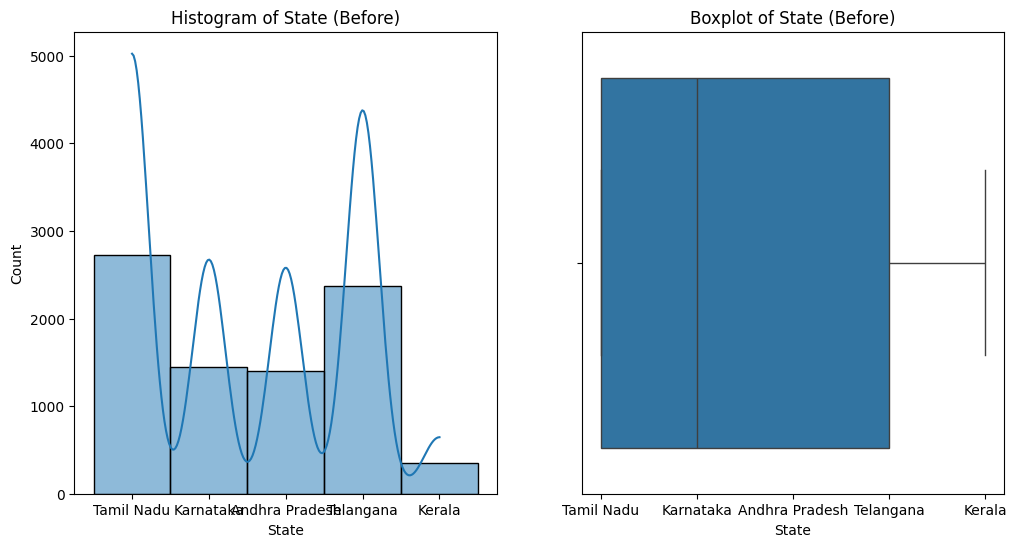

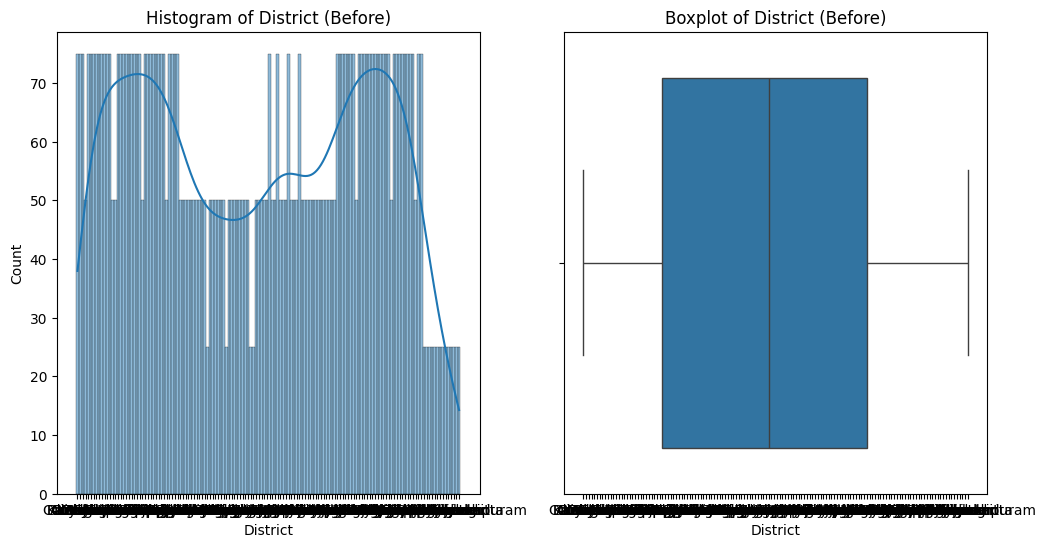

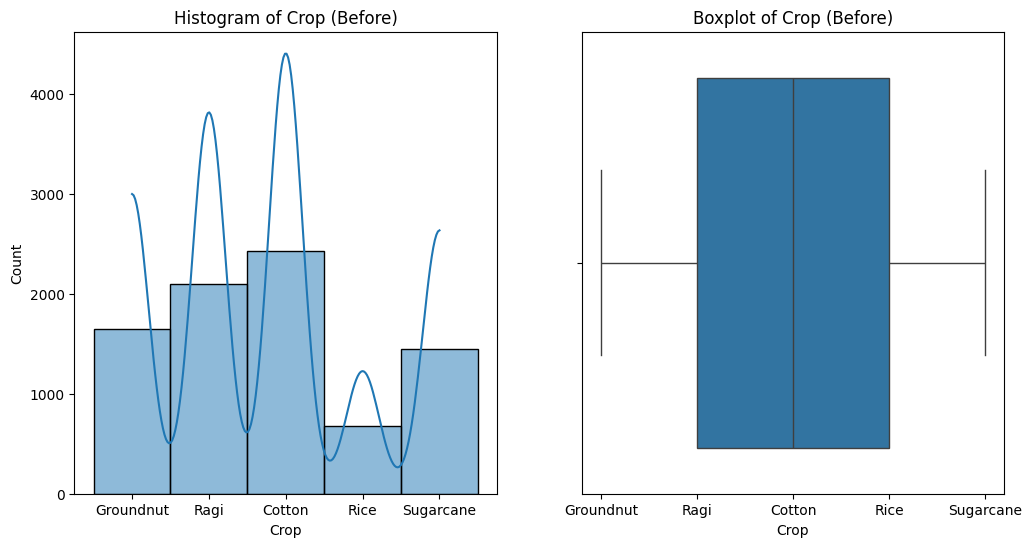

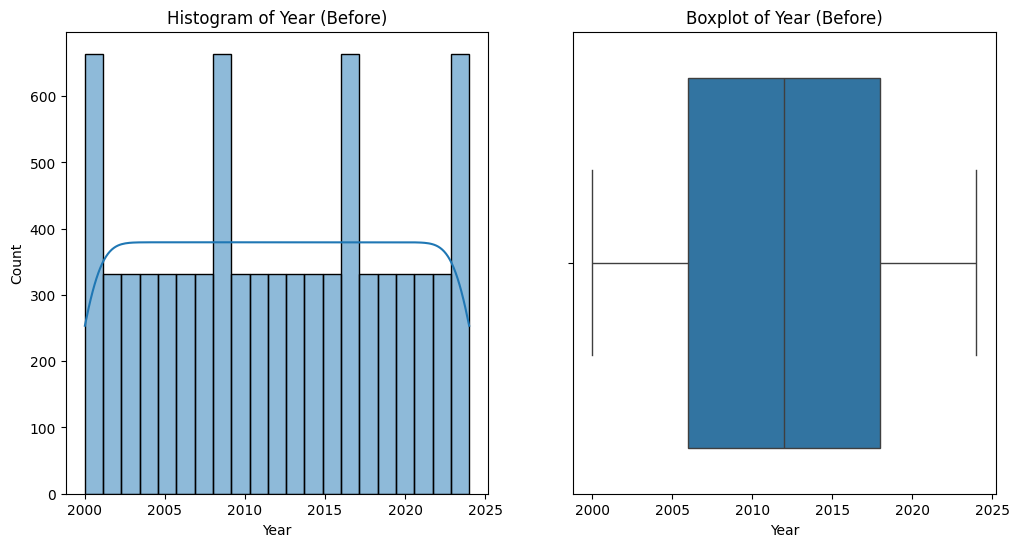

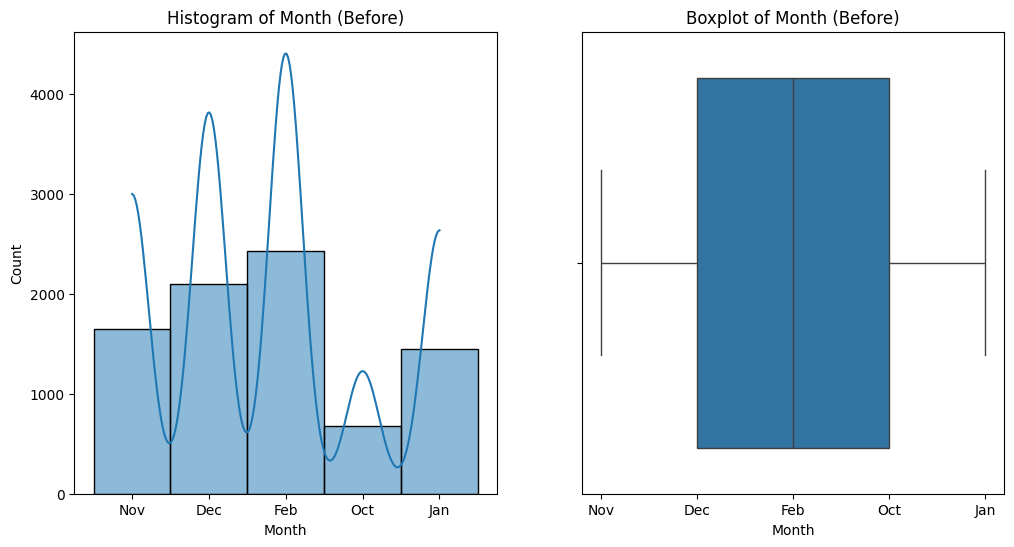

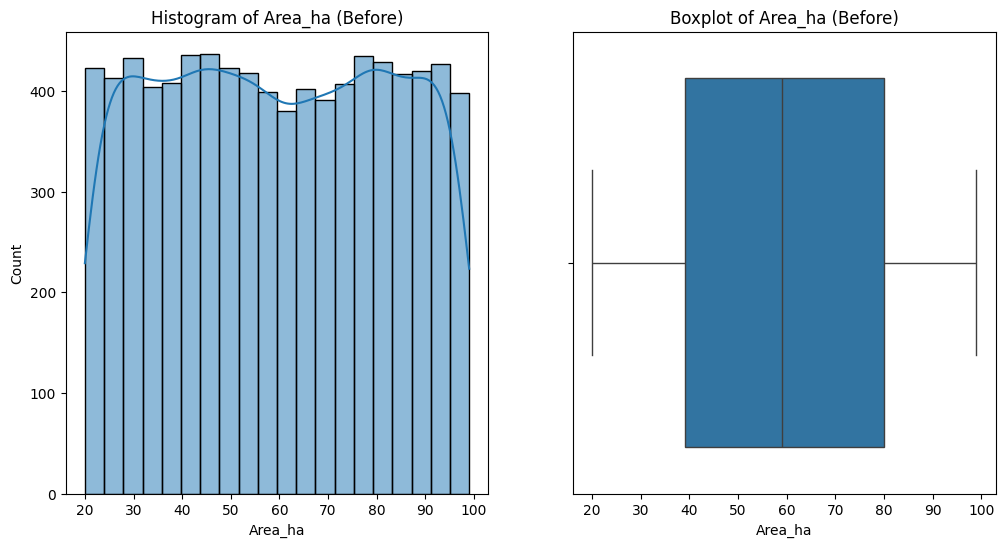

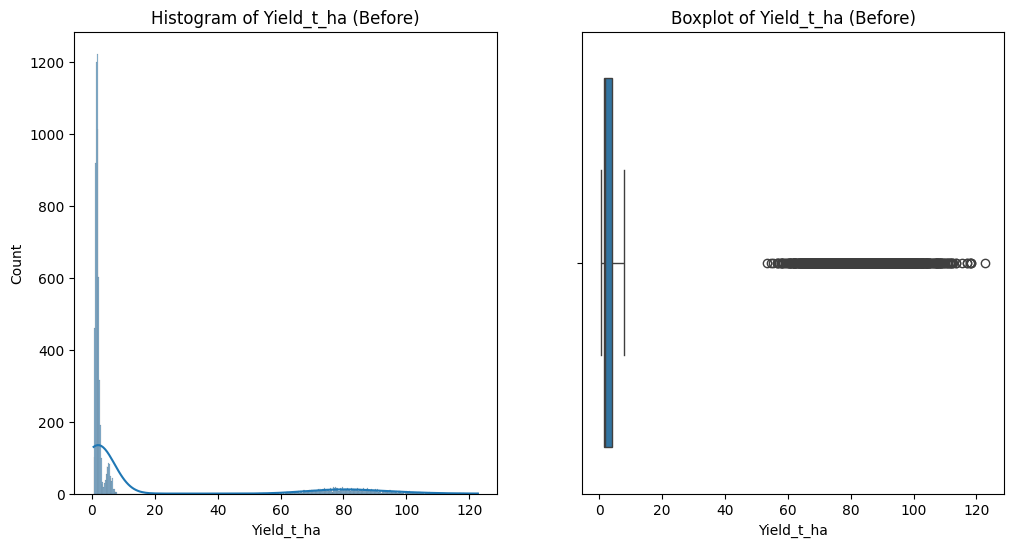

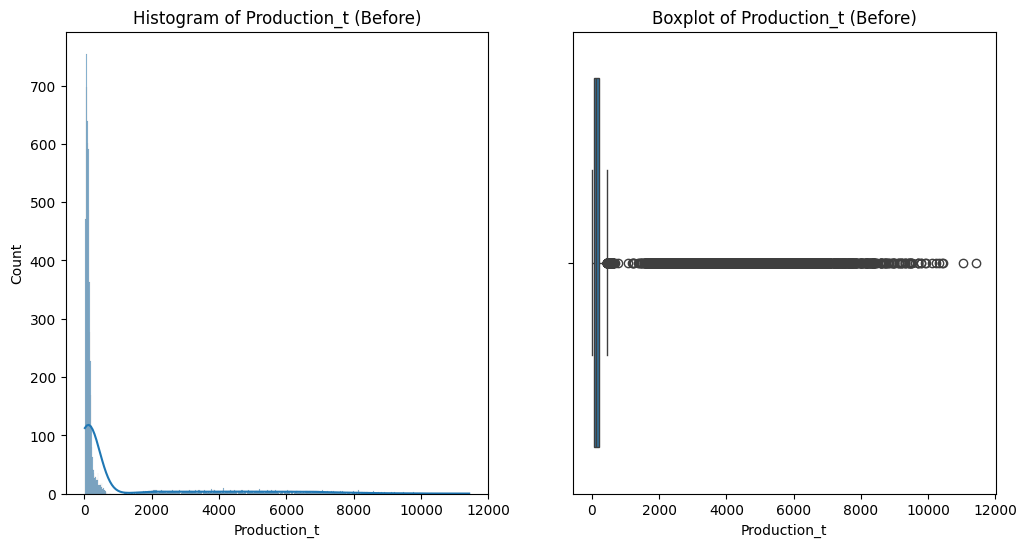

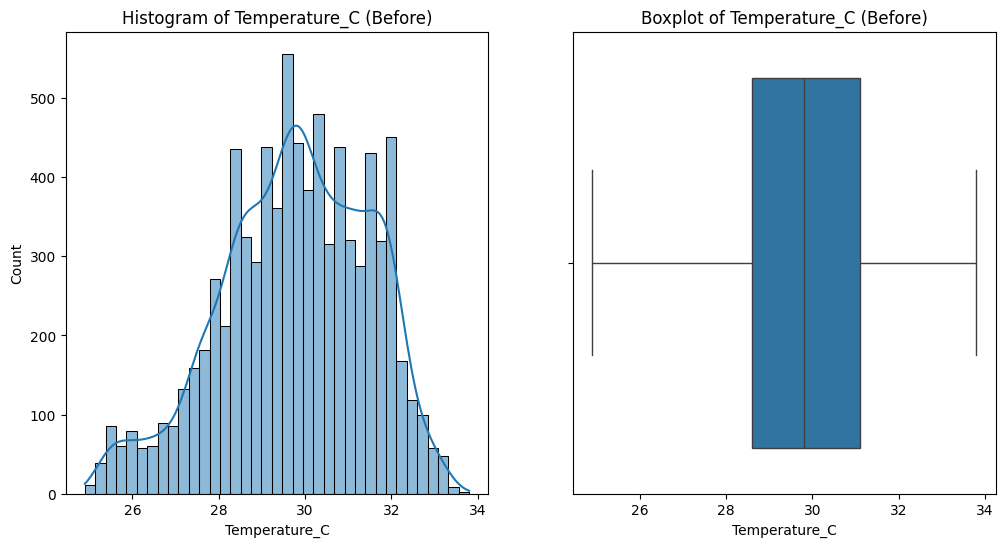

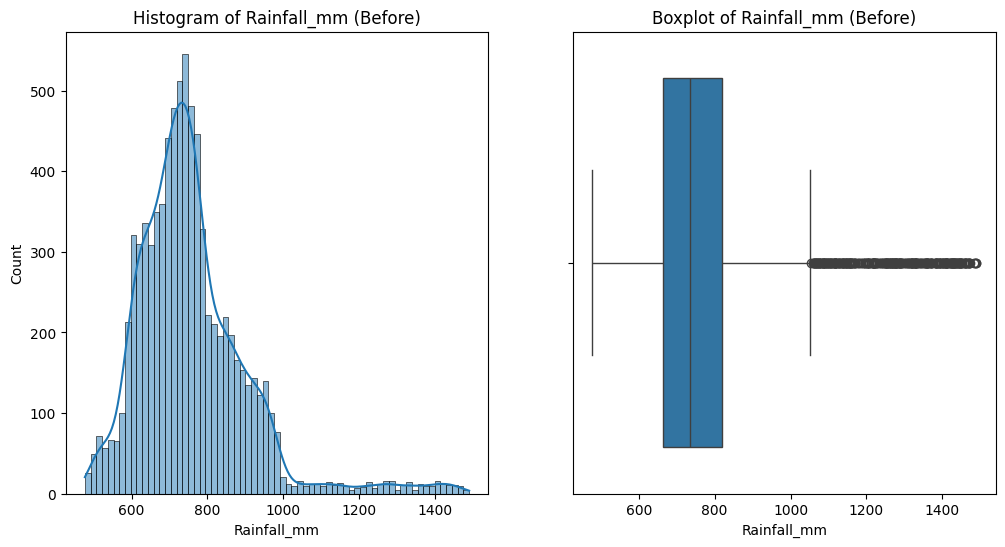

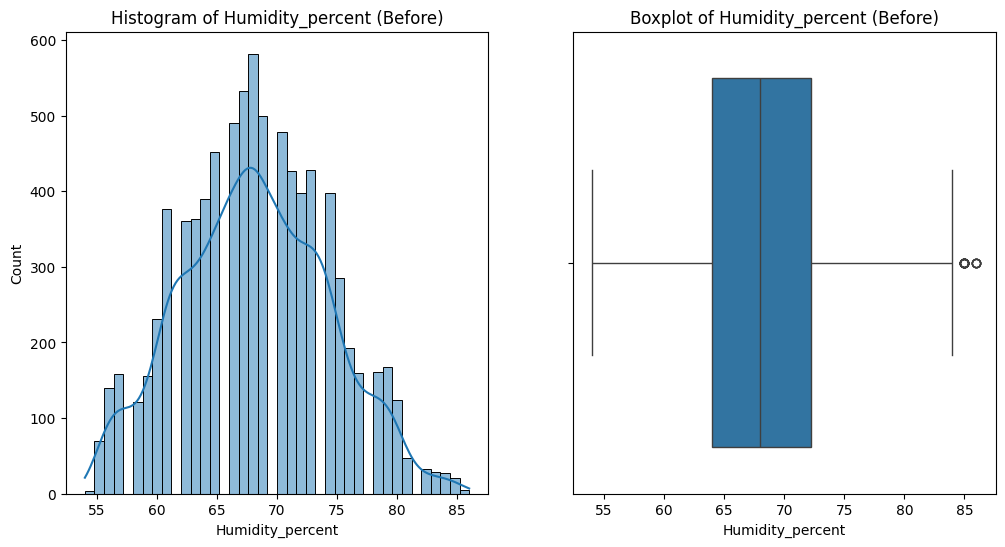

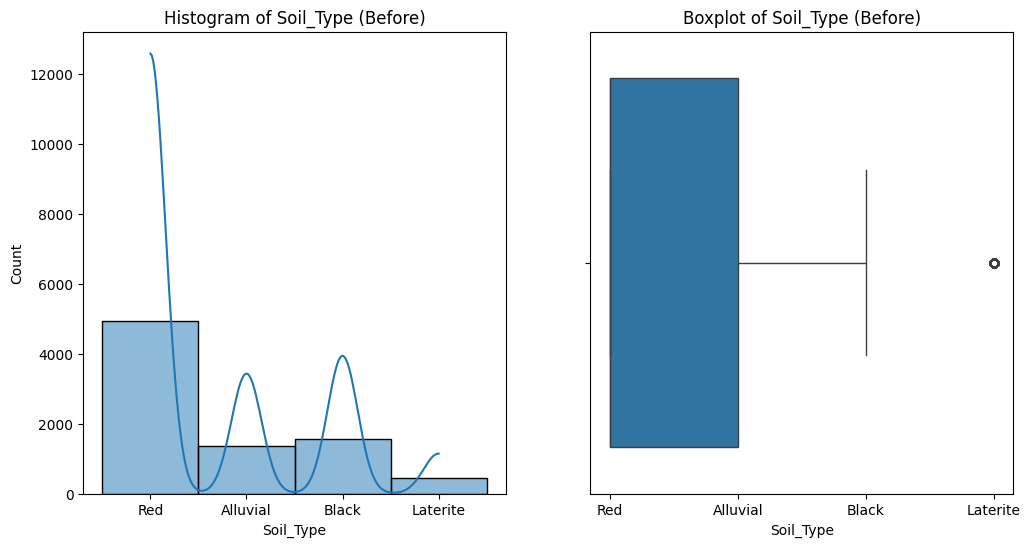

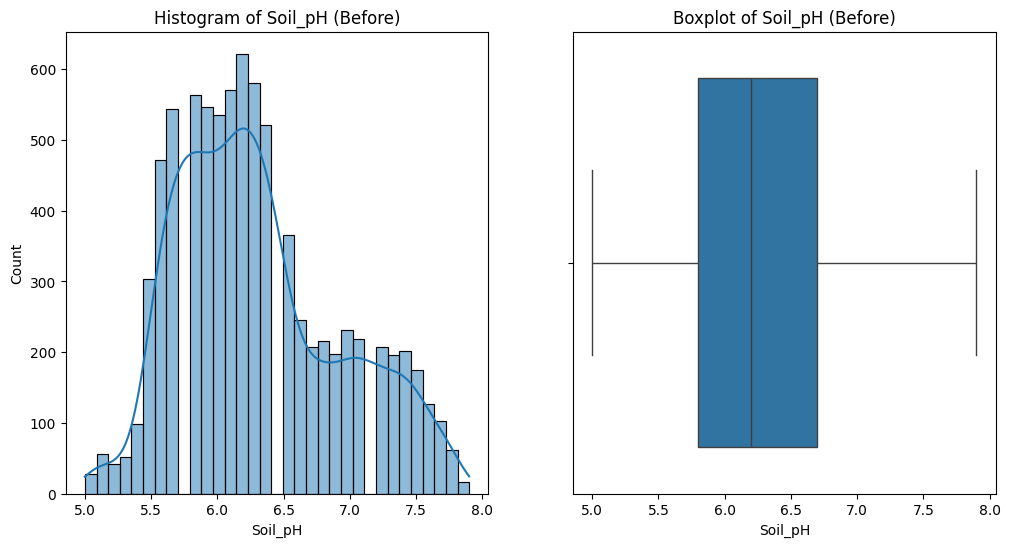

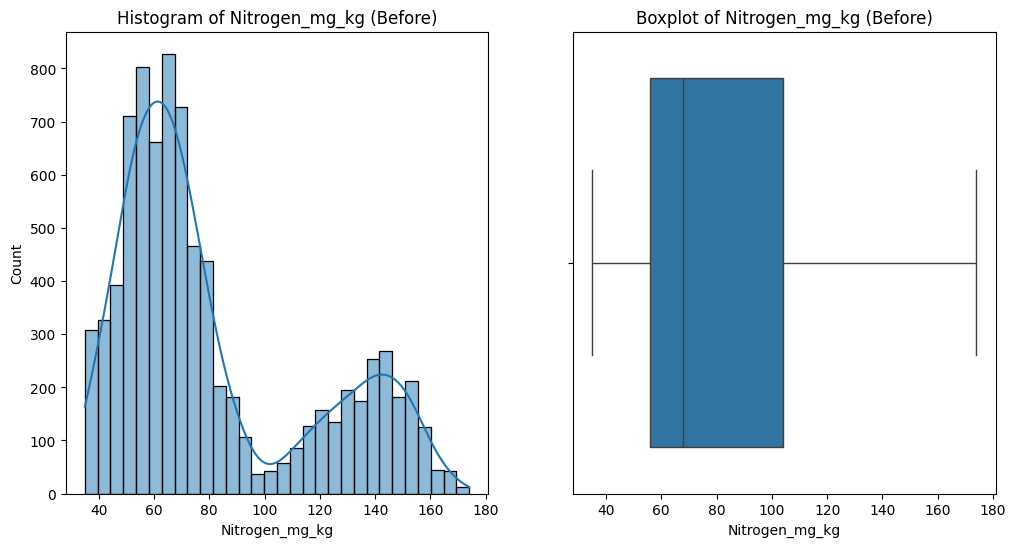

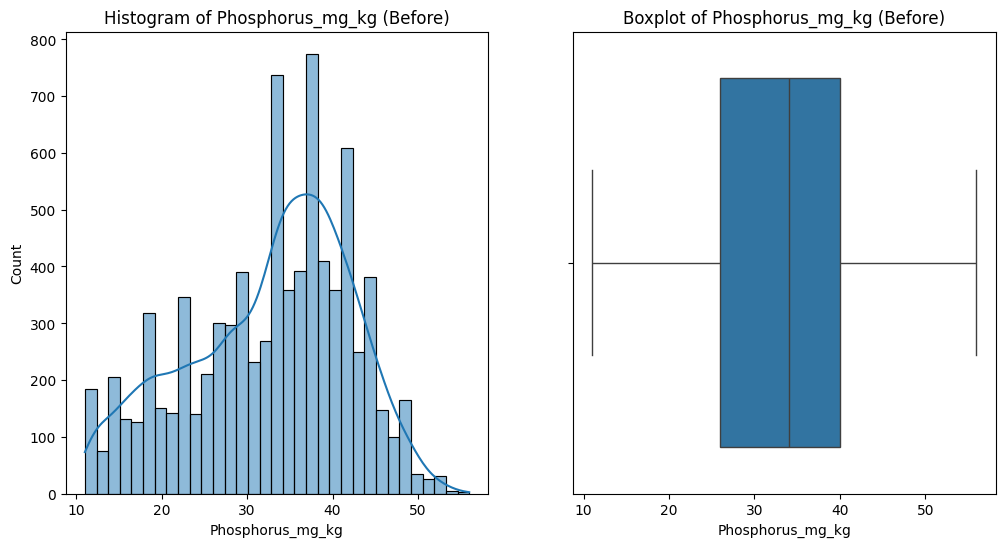

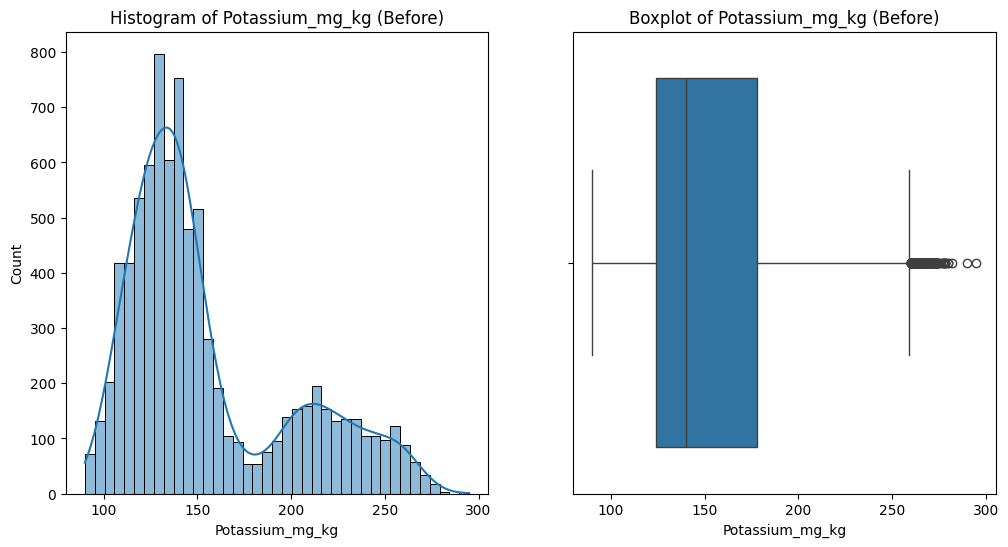

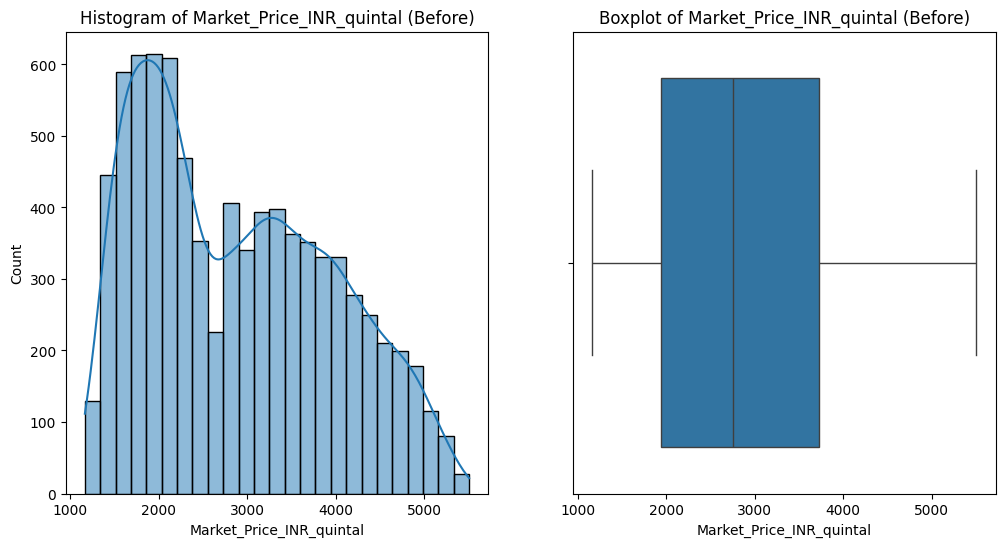

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize before replacement
for col in merged_df.columns:
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(merged_df[col], kde=True)
  plt.title(f"Histogram of {col} (Before)")
  plt.subplot(1, 2, 2)
  sns.boxplot(x=merged_df[col])
  plt.title(f"Boxplot of {col} (Before)")
  plt.show()

Column: Year
Initial outliers: 0
Replace value: 2012.0
Outliers after replacement: 0


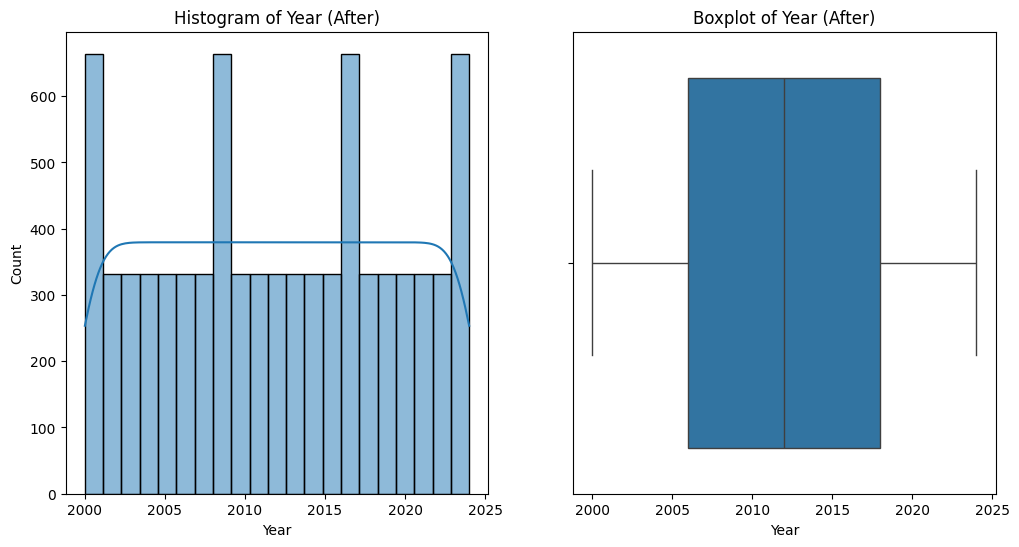

Change in outliers: 0
Column: Area_ha
Initial outliers: 0
Replace value: 59.0
Outliers after replacement: 0


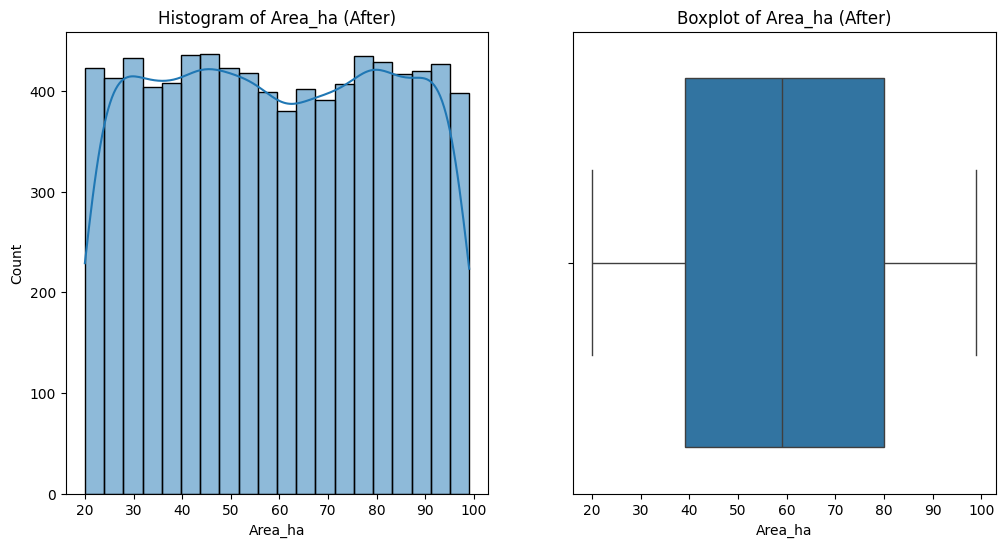

Change in outliers: 0
Column: Yield_t_ha
Initial outliers: 1436
Replace value: 1.8751486381726399
Outliers after replacement: 788


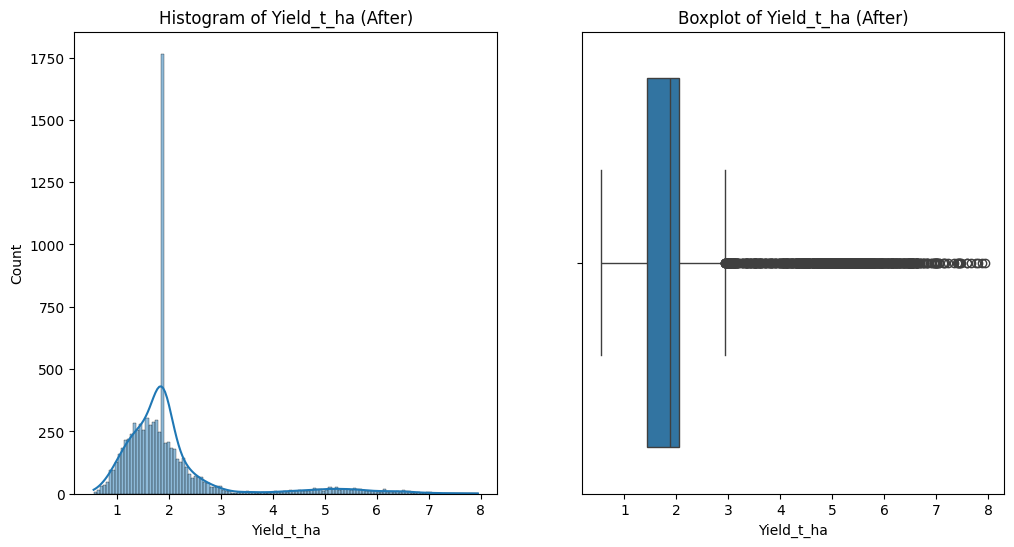

Change in outliers: -648
Column: Production_t
Initial outliers: 1581
Replace value: 119.0
Outliers after replacement: 473


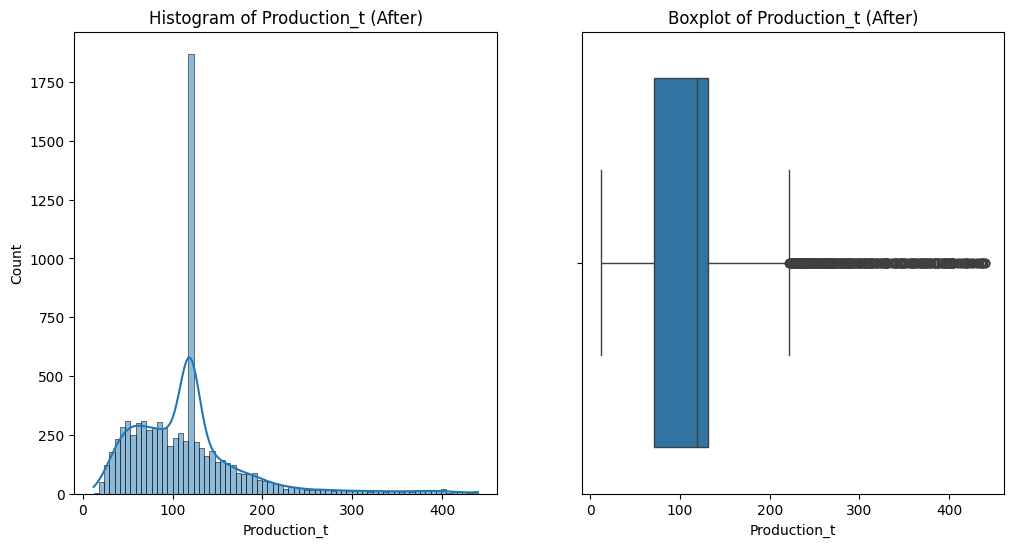

Change in outliers: -1108
Column: Temperature_C
Initial outliers: 0
Replace value: 29.8
Outliers after replacement: 0


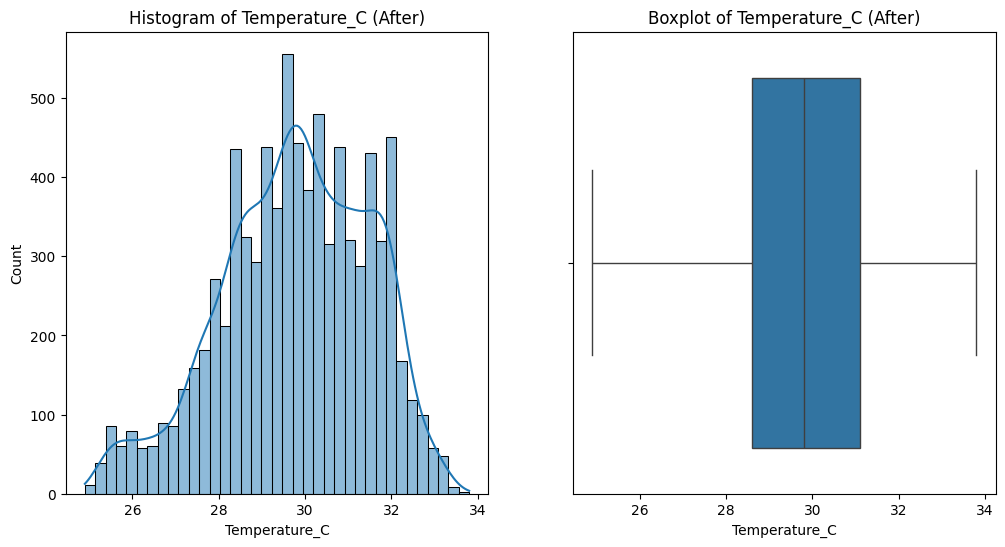

Change in outliers: 0
Column: Rainfall_mm
Initial outliers: 300
Replace value: 736.0
Outliers after replacement: 40


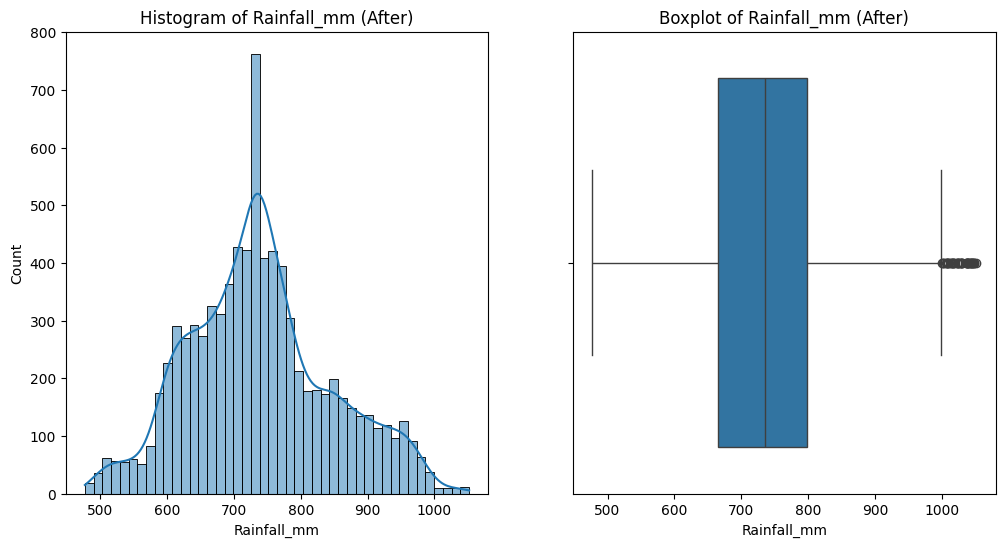

Change in outliers: -260
Column: Humidity_percent
Initial outliers: 25
Replace value: 68.0
Outliers after replacement: 0


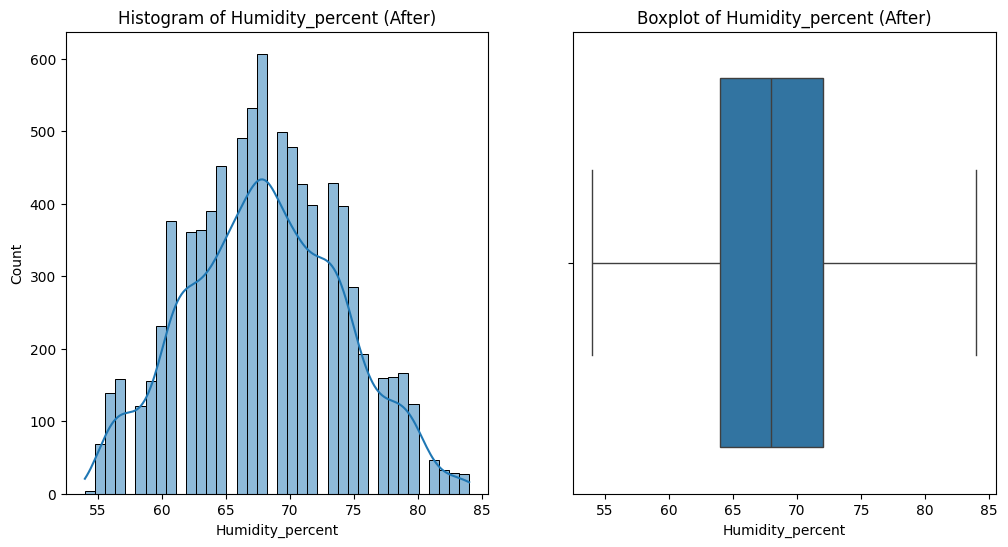

Change in outliers: -25
Column: Soil_pH
Initial outliers: 0
Replace value: 6.2
Outliers after replacement: 0


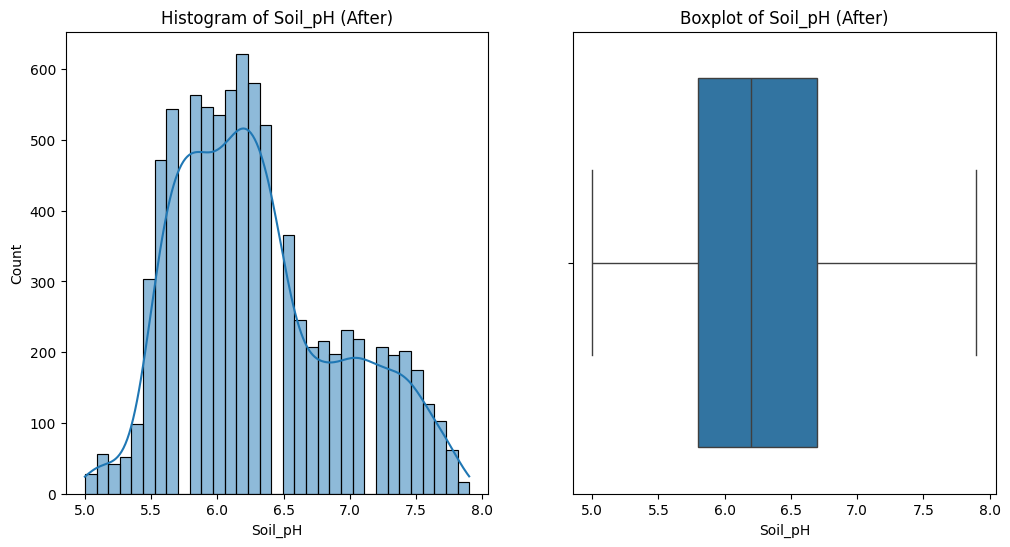

Change in outliers: 0
Column: Nitrogen_mg_kg
Initial outliers: 0
Replace value: 68.0
Outliers after replacement: 0


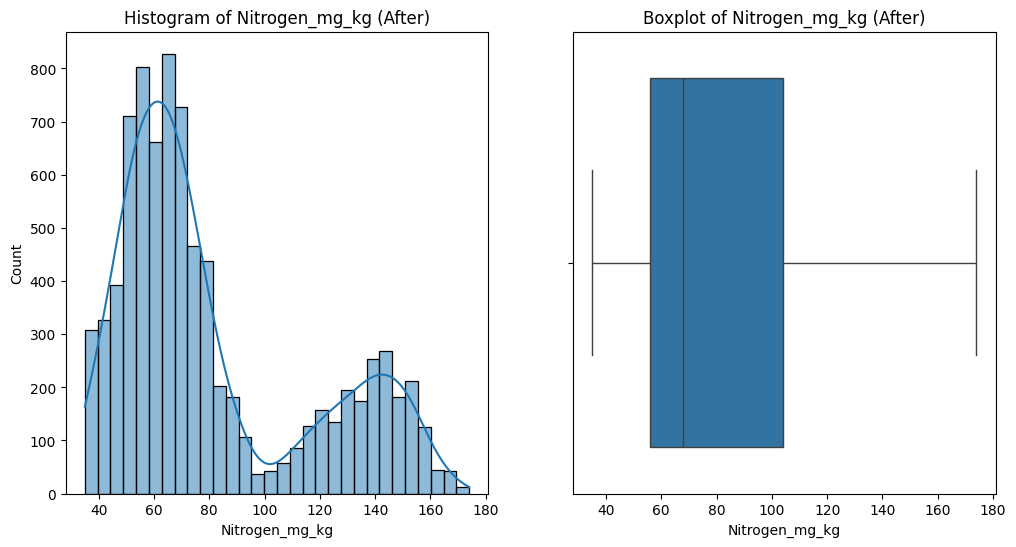

Change in outliers: 0
Column: Phosphorus_mg_kg
Initial outliers: 0
Replace value: 34.0
Outliers after replacement: 0


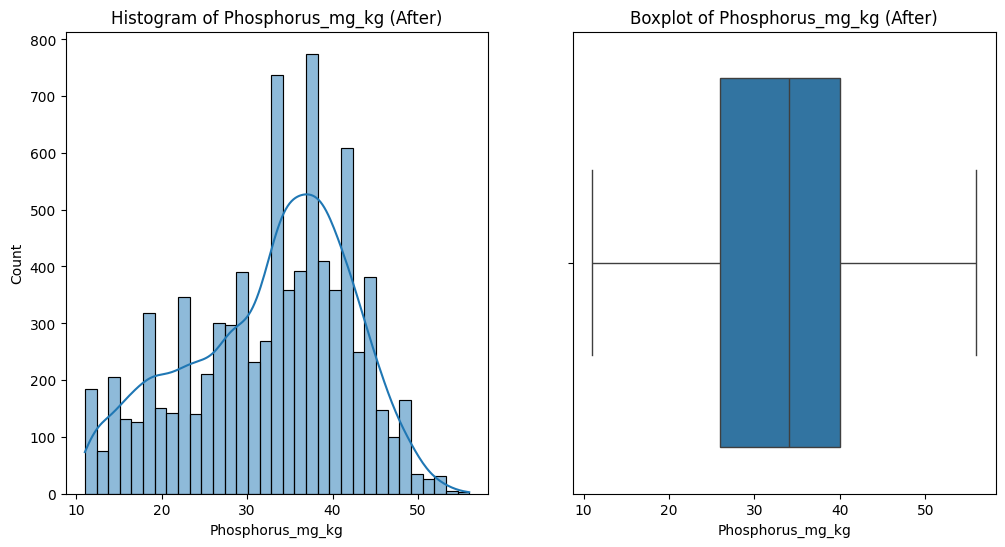

Change in outliers: 0
Column: Potassium_mg_kg
Initial outliers: 181
Replace value: 248.0
Outliers after replacement: 0


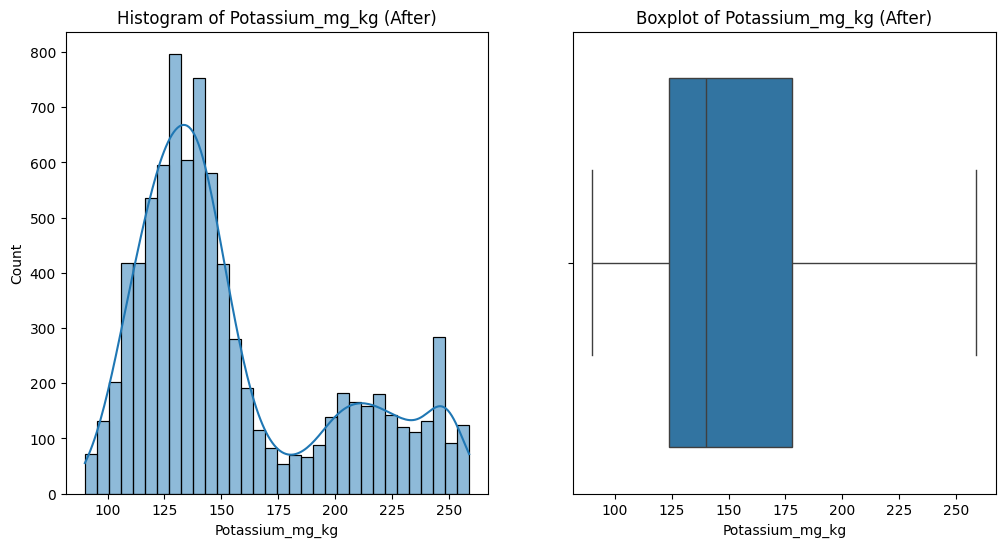

Change in outliers: -181
Column: Market_Price_INR_quintal
Initial outliers: 0
Replace value: 2757.0
Outliers after replacement: 0


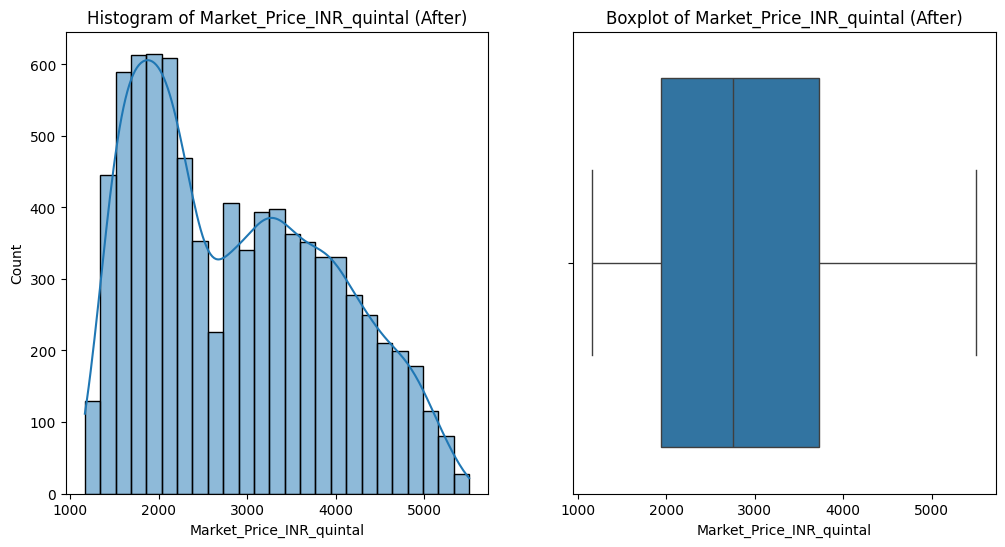

Change in outliers: 0


In [ ]:
# Replace outliers with median
def replace_outliers_with_median(df, columns):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if column is numeric
            print(f"Column: {col}")
            # Calculate initial number of outliers
            Q1_before = df[col].quantile(0.25)
            Q3_before = df[col].quantile(0.75)
            IQR_before = Q3_before - Q1_before
            lower_bound_before = Q1_before - 1.5 * IQR_before
            upper_bound_before = Q3_before + 1.5 * IQR_before
            initial_outliers_count = df[(df[col] < lower_bound_before) | (df[col] > upper_bound_before)].shape[0]
            print(f"Initial outliers: {initial_outliers_count}")

            replace_value = [df[col].median() if col!='Potassium_mg_kg' else df[col].quantile(0.95)][0]
            print(f"Replace value: {replace_value}")
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), replace_value, df[col])

            # Calculate number of outliers after replacement
            Q1_after = df[col].quantile(0.25)
            Q3_after = df[col].quantile(0.75)
            IQR_after = Q3_after - Q1_after
            lower_bound_after = Q1_after - 1.5 * IQR_after
            upper_bound_after = Q3_after + 1.5 * IQR_after
            final_outliers_count = df[(df[col] < lower_bound_after) | (df[col] > upper_bound_after)].shape[0]
            print(f"Outliers after replacement: {final_outliers_count}")

            # Visualize after replacement
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            sns.histplot(df[col], kde=True)
            plt.title(f"Histogram of {col} (After)")
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot of {col} (After)")
            plt.show()

            print(f"Change in outliers: {final_outliers_count - initial_outliers_count}")

    return df

merged_df = replace_outliers_with_median(merged_df, outliers_merged_df.keys())

In [ ]:
# Check if outliers still exist
outliers_merged_df_after = detect_outliers(merged_df, merged_df.columns.tolist())
outliers_merged_df_after

{'Year': 0,
 'Area_ha': 0,
 'Yield_t_ha': 788,
 'Production_t': 473,
 'Temperature_C': 0,
 'Rainfall_mm': 40,
 'Humidity_percent': 0,
 'Soil_pH': 0,
 'Nitrogen_mg_kg': 0,
 'Phosphorus_mg_kg': 0,
 'Potassium_mg_kg': 0,
 'Market_Price_INR_quintal': 0}

In [ ]:
# # Handle skewness
# def handle_skewness(df, columns):
#     for col in columns:
#         # Use pd.api.types.is_numeric_dtype if Pandas version is old
#         # Otherwise, use is_numeric_dtype directly from pd
#         if pd.api.types.is_numeric_dtype(df[col]) if hasattr(pd, 'api') else pd.is_numeric_dtype(df[col]):  # Check if column is numeric
#             skewness = df[col].skew()
#             if skewness > 0.75 or skewness < -0.75:
#                 df[col] = np.log1p(df[col])
#     return df

# skewness = handle_skewness(merged_df, ['Yield_t_ha', 'Production_t'])
# skewness.describe()

In [ ]:
merged_df.head()

,State,District,Crop,Year,Month,Area_ha,Yield_t_ha,Production_t,Temperature_C,Rainfall_mm,Humidity_percent,Soil_Type,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,Market_Price_INR_quintal
0,Tamil Nadu,Ariyalur,Groundnut,2000.0,Nov,71.0,1.408669,100.0,31.3,993.0,73.0,Red,6.4,54.0,43.0,108.0,2437.0
1,Tamil Nadu,Ariyalur,Ragi,2000.0,Dec,43.0,1.735186,75.0,28.4,735.0,65.0,Red,5.8,61.0,16.0,116.0,1405.0
2,Tamil Nadu,Ariyalur,Cotton,2000.0,Feb,52.0,1.153071,60.0,28.1,821.0,65.0,Red,6.0,72.0,38.0,148.0,2944.0
3,Tamil Nadu,Chennai,Groundnut,2000.0,Nov,81.0,0.660332,53.0,30.6,721.0,67.0,Red,5.8,47.0,43.0,113.0,2641.0
4,Tamil Nadu,Chennai,Ragi,2000.0,Dec,26.0,1.202783,31.0,31.7,994.0,70.0,Red,6.1,78.0,16.0,147.0,1310.0


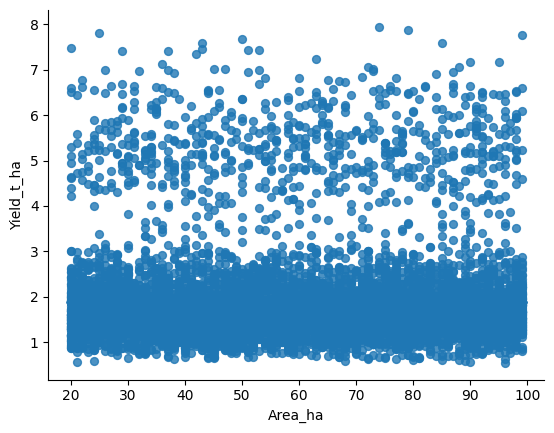

In [ ]:
merged_df.plot(kind='scatter', x='Area_ha', y='Yield_t_ha', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

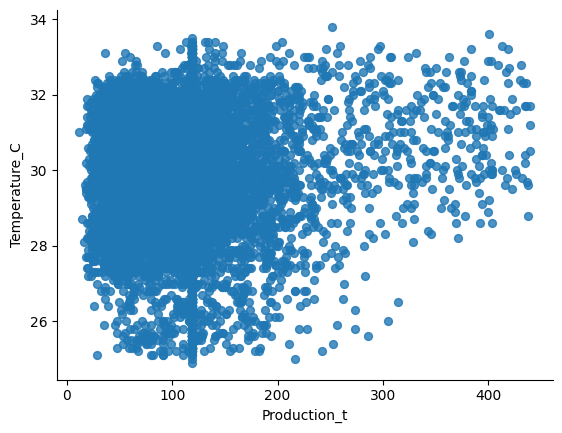

In [ ]:
merged_df.plot(kind='scatter', x='Production_t', y='Temperature_C', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

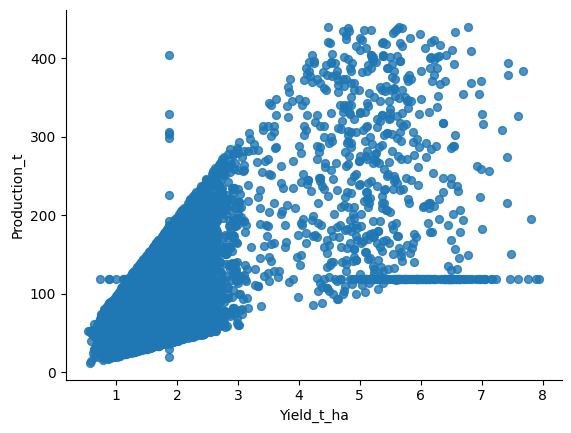

In [ ]:
merged_df.plot(kind='scatter', x='Yield_t_ha', y='Production_t', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

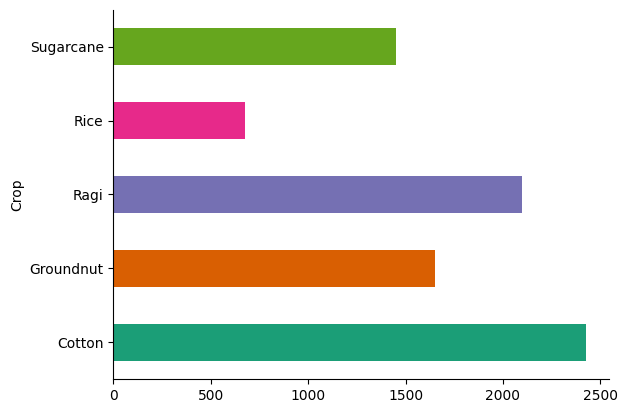

In [ ]:
merged_df.groupby('Crop').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

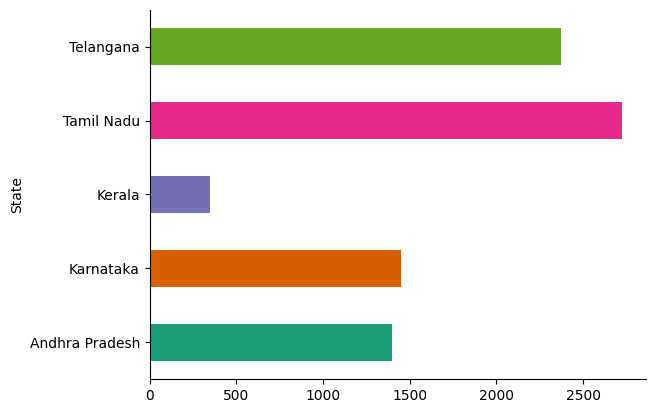

In [ ]:
merged_df.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

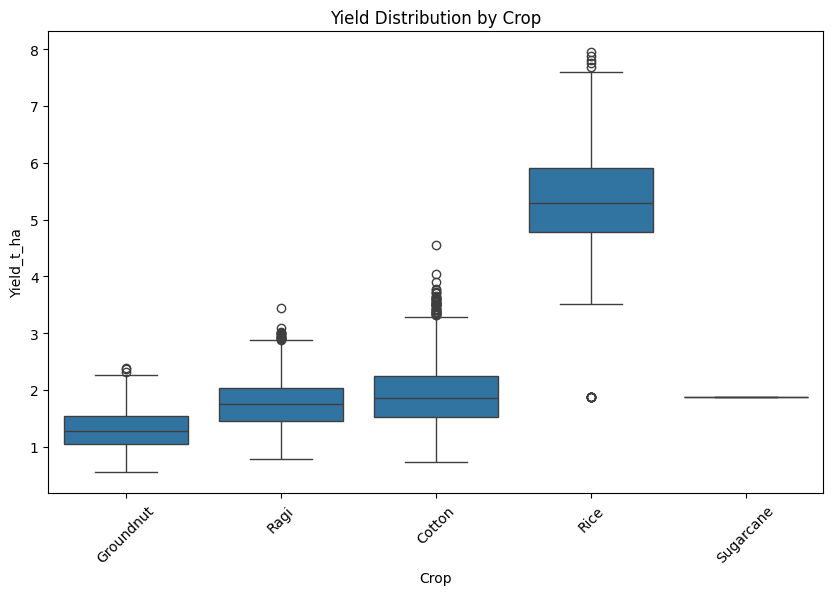

In [ ]:
# Plot of yield distribution by crop
plt.figure(figsize=(10, 6))
sns.boxplot(x='Crop', y='Yield_t_ha', data=merged_df)
plt.title('Yield Distribution by Crop')
plt.xticks(rotation=45)
plt.show()

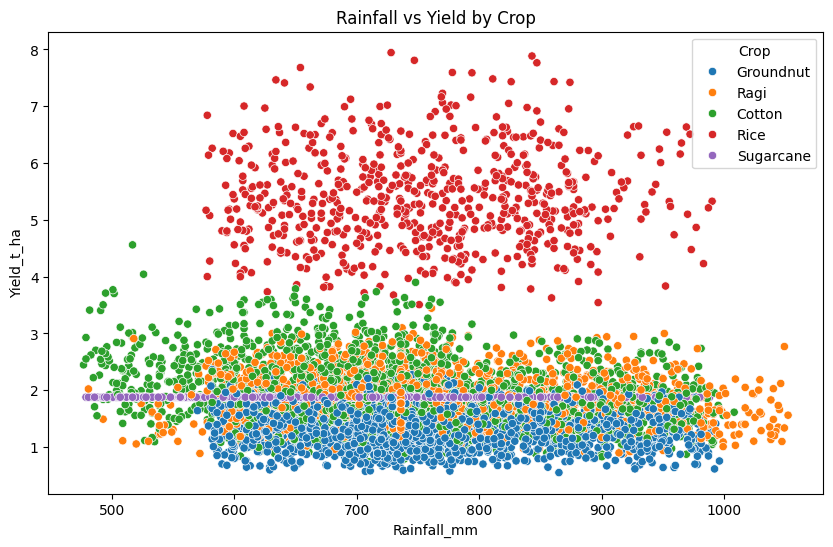

In [ ]:
# Rainfall vs yield by crop
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall_mm', y='Yield_t_ha', hue='Crop', data=merged_df)
plt.title('Rainfall vs Yield by Crop')
plt.show()

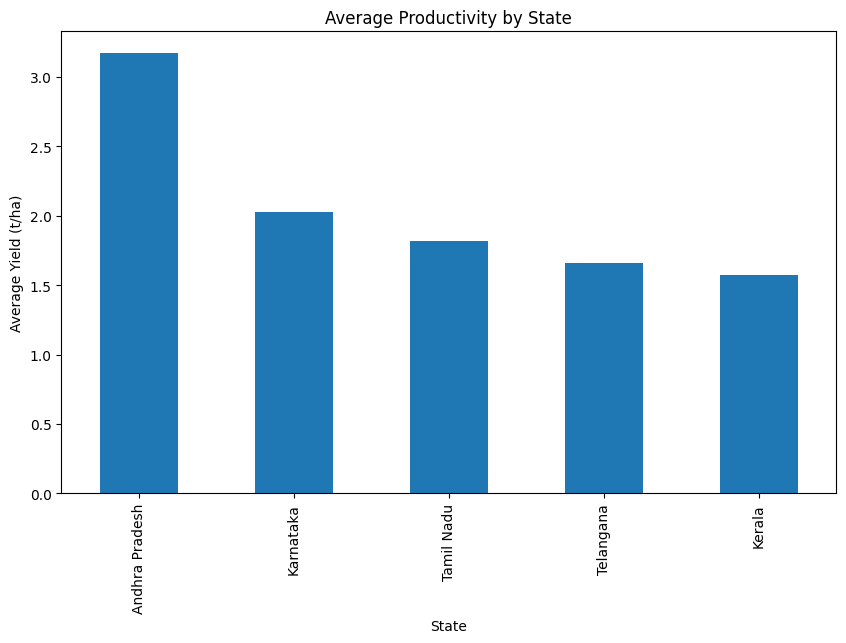

In [ ]:
# Average productivity by state
avg_productivity = merged_df.groupby('State')['Yield_t_ha'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_productivity.plot(kind='bar')
plt.title('Average Productivity by State')
plt.ylabel('Average Yield (t/ha)')
plt.show()

<Figure size 1200x800 with 0 Axes>

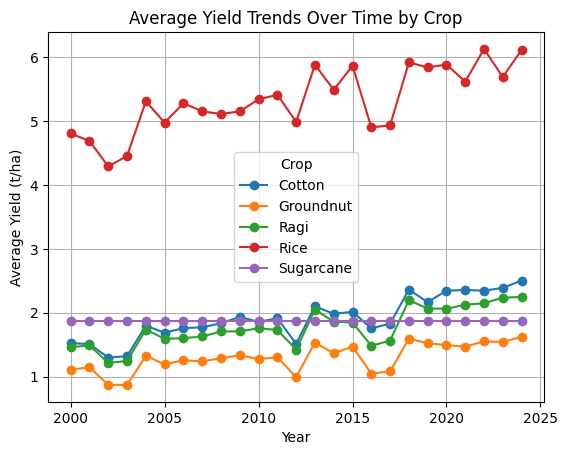

In [ ]:
# Average Yield trends over time by crop
avg_yield_trends = merged_df.groupby(['Year', 'Crop'])['Yield_t_ha'].mean().unstack()
plt.figure(figsize=(12, 8))
avg_yield_trends.plot(marker='o')
plt.title('Average Yield Trends Over Time by Crop')
plt.xlabel('Year')
plt.ylabel('Average Yield (t/ha)')
plt.legend(title='Crop')
plt.grid(True)
plt.show()

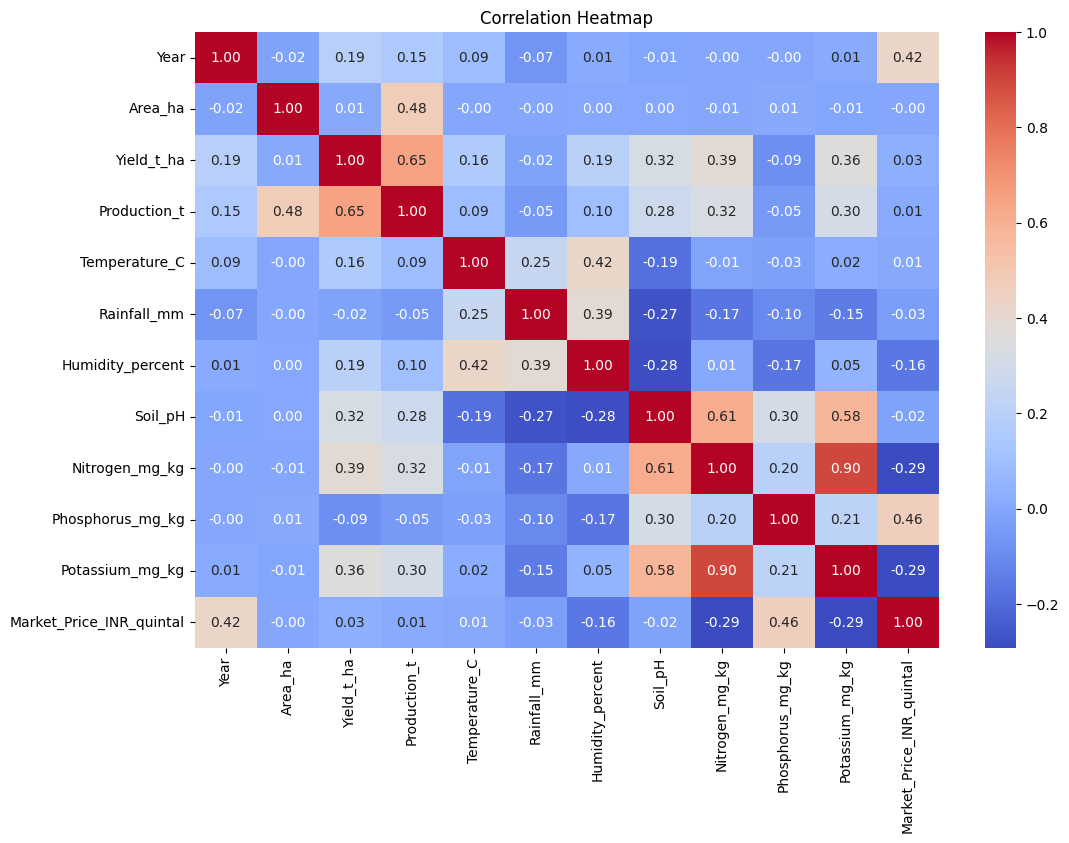

In [ ]:
# Heat map
correlation_matrix = merged_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Find highly correlated columns
highly_correlated_cols = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.6]
highly_correlated_cols

[('Yield_t_ha', 'Production_t'),
 ('Production_t', 'Yield_t_ha'),
 ('Soil_pH', 'Nitrogen_mg_kg'),
 ('Nitrogen_mg_kg', 'Soil_pH'),
 ('Nitrogen_mg_kg', 'Potassium_mg_kg'),
 ('Potassium_mg_kg', 'Nitrogen_mg_kg')]

In [ ]:
# Drop production_t
merged_df.drop('Production_t', axis=1, inplace=True)
merged_df.columns

Index(['State', 'District', 'Crop', 'Year', 'Month', 'Area_ha', 'Yield_t_ha',
       'Temperature_C', 'Rainfall_mm', 'Humidity_percent', 'Soil_Type',
       'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg',
       'Market_Price_INR_quintal'],
      dtype='object')

In [ ]:
merged_df.shape

(8300, 16)

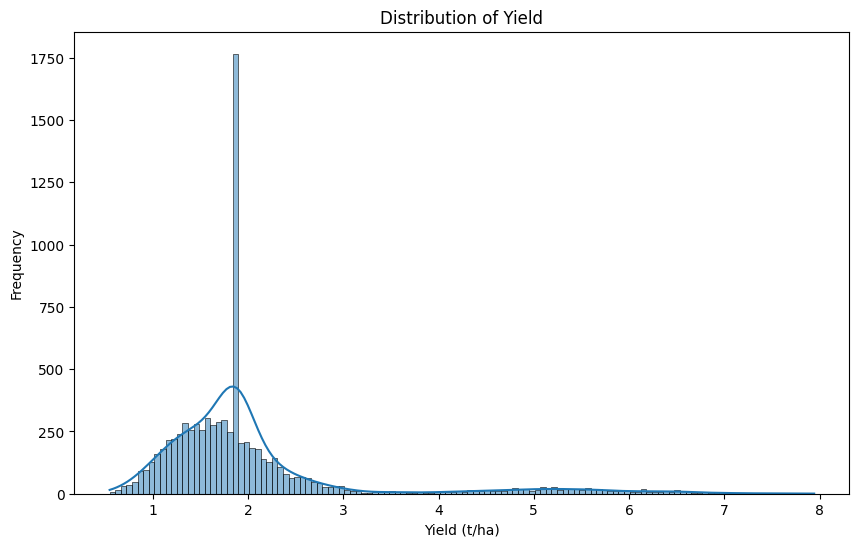

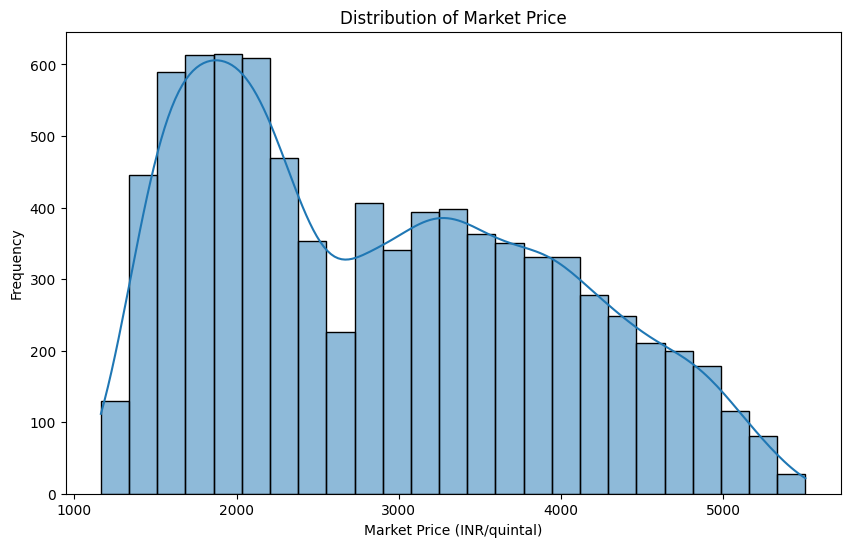

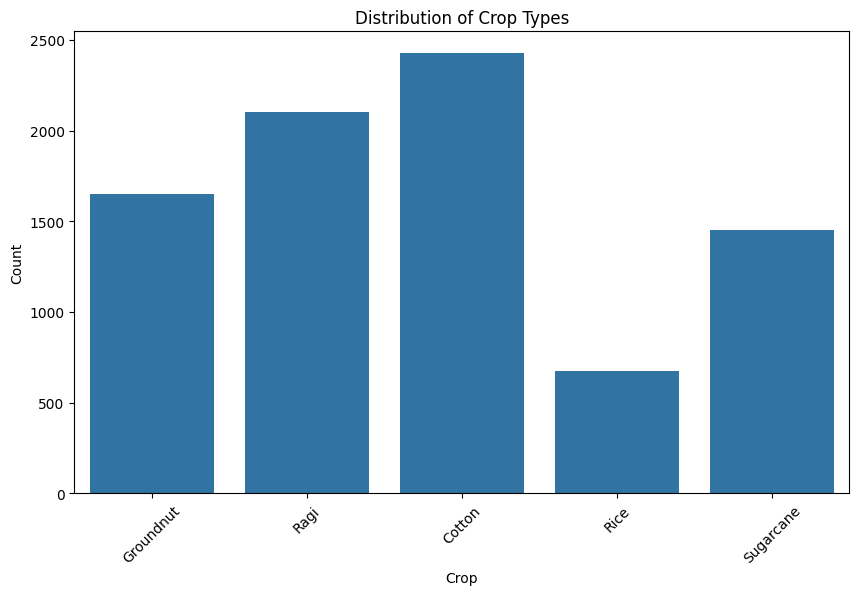

In [ ]:
# Target variable are crop yield, crop price and crop type distribution

# Crop yield distributtion
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Yield_t_ha'], kde=True)
plt.title('Distribution of Yield')
plt.xlabel('Yield (t/ha)')
plt.ylabel('Frequency')
plt.show()

# Crop price distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Market_Price_INR_quintal'], kde=True)
plt.title('Distribution of Market Price')
plt.xlabel('Market Price (INR/quintal)')
plt.ylabel('Frequency')
plt.show()

# Crop type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Crop', data=merged_df)
plt.title('Distribution of Crop Types')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# One hot encoding
merged_df_encoded = pd.get_dummies(merged_df, columns=['State', 'District', 'Crop', 'Soil_Type', 'Month'], drop_first=True)
merged_df_encoded.head()

,Year,Area_ha,Yield_t_ha,Temperature_C,Rainfall_mm,Humidity_percent,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,...,Crop_Ragi,Crop_Rice,Crop_Sugarcane,Soil_Type_Black,Soil_Type_Laterite,Soil_Type_Red,Month_Feb,Month_Jan,Month_Nov,Month_Oct
0,2000.0,71.0,1.408669,31.3,993.0,73.0,6.4,54.0,43.0,108.0,...,False,False,False,False,False,True,False,False,True,False
1,2000.0,43.0,1.735186,28.4,735.0,65.0,5.8,61.0,16.0,116.0,...,True,False,False,False,False,True,False,False,False,False
2,2000.0,52.0,1.153071,28.1,821.0,65.0,6.0,72.0,38.0,148.0,...,False,False,False,False,False,True,True,False,False,False
3,2000.0,81.0,0.660332,30.6,721.0,67.0,5.8,47.0,43.0,113.0,...,False,False,False,False,False,True,False,False,True,False
4,2000.0,26.0,1.202783,31.7,994.0,70.0,6.1,78.0,16.0,147.0,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
merged_df.Crop.unique()

array(['Groundnut', 'Ragi', 'Cotton', 'Rice', 'Sugarcane'], dtype=object)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder

# # Perform a single train-test split of the entire DataFrame
# train_df, test_df = train_test_split(merged_df_encoded, test_size=0.2, random_state=42)

# # Define numerical columns to scale (exclude one-hot encoded columns and targets)
# numerical_cols = ['Year', 'Area_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent',
#                  'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg',
#                  'Yield_t_ha', 'Market_Price_INR_quintal']

# # Fit the scaler on the numerical columns of train_df
# scaler = StandardScaler()
# train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
# test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# # Define X and y for each target using the split DataFrames:

# # For Yield: Drop Market_Price_INR_quintal and Yield_t_ha
# X_yield_train = train_df.drop(['Yield_t_ha', 'Market_Price_INR_quintal'], axis=1)
# y_yield_train = train_df['Yield_t_ha']
# X_yield_test = test_df.drop(['Yield_t_ha', 'Market_Price_INR_quintal'], axis=1)
# y_yield_test = test_df['Yield_t_ha']

# # For Crop: Drop Yield_t_ha, Market_Price_INR_quintal, and Crop_* columns
# # Create Crop_Type as the target
# train_df['Crop_Type'] = train_df[['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane']].idxmax(axis=1).str.replace('Crop_', '')
# test_df['Crop_Type'] = test_df[['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane']].idxmax(axis=1).str.replace('Crop_', '')

# # Label encode the Crop_Type labels
# label_encoder = LabelEncoder()
# y_crop_train = label_encoder.fit_transform(train_df['Crop_Type'])
# y_crop_test = label_encoder.transform(test_df['Crop_Type'])

# X_crop_train = train_df.drop(['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane', 'Crop_Type', 'Yield_t_ha', 'Market_Price_INR_quintal'], axis=1)
# X_crop_test = test_df.drop(['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane', 'Crop_Type', 'Yield_t_ha', 'Market_Price_INR_quintal'], axis=1)

# # For Price: Drop Market_Price_INR_quintal, keep Yield_t_ha
# X_price_train = train_df.drop(['Market_Price_INR_quintal', 'Crop_Type'], axis=1)
# y_price_train = train_df['Market_Price_INR_quintal']
# X_price_test = test_df.drop(['Market_Price_INR_quintal', 'Crop_Type'], axis=1)
# y_price_test = test_df['Market_Price_INR_quintal']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle
import os

# Perform a single train-test split of the entire DataFrame
train_df, test_df = train_test_split(merged_df_encoded, test_size=0.2, random_state=42)

# Debug: Check columns in train_df to confirm Yield_t_ha exists
print("Columns in train_df:", train_df.columns.tolist())
if 'Yield_t_ha' not in train_df.columns:
    possible_yield_columns = [col for col in train_df.columns if 'yield' in col.lower()]
    if possible_yield_columns:
        print(f"Found possible yield columns: {possible_yield_columns}. Using the first one: {possible_yield_columns[0]}")
        train_df = train_df.rename(columns={possible_yield_columns[0]: 'Yield_t_ha'})
        test_df = test_df.rename(columns={possible_yield_columns[0]: 'Yield_t_ha'})
    else:
        raise ValueError("Yield_t_ha is missing from train_df, and no similar column found. Check the data preparation steps in merged_df_encoded.")

# Define X and y for each target using the split DataFrames:

# For Crop: Drop Yield_t_ha, Market_Price_INR_quintal, and Crop_* columns
# Create Crop_Type as the target
train_df['Crop_Type'] = train_df[['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane']].idxmax(axis=1).str.replace('Crop_', '')
test_df['Crop_Type'] = test_df[['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane']].idxmax(axis=1).str.replace('Crop_', '')

# Label encode the Crop_Type labels
label_encoder = LabelEncoder()
y_crop_train = label_encoder.fit_transform(train_df['Crop_Type'])
y_crop_test = label_encoder.transform(test_df['Crop_Type'])

X_crop_train = train_df.drop(['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane', 'Crop_Type', 'Yield_t_ha', 'Market_Price_INR_quintal'], axis=1)
X_crop_test = test_df.drop(['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane', 'Crop_Type', 'Yield_t_ha', 'Market_Price_INR_quintal'], axis=1)

# For Yield: Drop Market_Price_INR_quintal and Yield_t_ha (Crop_* columns are kept as features)
X_yield_train = train_df.drop(['Yield_t_ha', 'Market_Price_INR_quintal', 'Crop_Type'], axis=1)
y_yield_train = train_df['Yield_t_ha']
X_yield_test = test_df.drop(['Yield_t_ha', 'Market_Price_INR_quintal', 'Crop_Type'], axis=1)
y_yield_test = test_df['Yield_t_ha']

# For Price: Drop Market_Price_INR_quintal, keep Yield_t_ha and Crop_* columns
X_price_train = train_df.drop(['Market_Price_INR_quintal', 'Crop_Type'], axis=1)
y_price_train = train_df['Market_Price_INR_quintal']
X_price_test = test_df.drop(['Market_Price_INR_quintal', 'Crop_Type'], axis=1)
y_price_test = test_df['Market_Price_INR_quintal']

# Define numerical columns to scale for each model
numerical_cols_crop = ['Year', 'Area_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent',
                       'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg']

numerical_cols_yield = ['Year', 'Area_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent',
                        'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg']

numerical_cols_price = ['Year', 'Area_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent',
                        'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg', 'Yield_t_ha']

# Create separate scalers for each model
# Scaler for crop prediction
scaler_crop = StandardScaler()
print("Columns for crop scaler:", numerical_cols_crop)
scaler_crop.fit(X_crop_train[numerical_cols_crop])
X_crop_train[numerical_cols_crop] = scaler_crop.transform(X_crop_train[numerical_cols_crop])
X_crop_test[numerical_cols_crop] = scaler_crop.transform(X_crop_test[numerical_cols_crop])

# Scaler for yield prediction
scaler_yield = StandardScaler()
print("Columns for yield scaler:", numerical_cols_yield)
scaler_yield.fit(X_yield_train[numerical_cols_yield])
X_yield_train[numerical_cols_yield] = scaler_yield.transform(X_yield_train[numerical_cols_yield])
X_yield_test[numerical_cols_yield] = scaler_yield.transform(X_yield_test[numerical_cols_yield])

# Scaler for price prediction
scaler_price = StandardScaler()
print("Columns for price scaler:", numerical_cols_price)
scaler_price.fit(X_price_train[numerical_cols_price])
X_price_train[numerical_cols_price] = scaler_price.transform(X_price_train[numerical_cols_price])
X_price_test[numerical_cols_price] = scaler_price.transform(X_price_test[numerical_cols_price])

# Debug: Confirm columns after scaling
print("Columns in X_crop_train after scaling:", X_crop_train.columns.tolist())
print("Columns in X_yield_train after scaling:", X_yield_train.columns.tolist())
print("Columns in X_price_train after scaling:", X_price_train.columns.tolist())

# Define feature names for each model
feature_names = {
    'crop_features': X_crop_train.columns.tolist(),
    'yield_features': X_yield_train.columns.tolist(),
    'price_features': X_price_train.columns.tolist()
}

# Debug: Print feature_names to confirm Yield_t_ha is in price_features
print("Crop features:", feature_names['crop_features'])
print("Yield features:", feature_names['yield_features'])
print("Price features:", feature_names['price_features'])
if 'Yield_t_ha' not in feature_names['price_features']:
    raise ValueError("Yield_t_ha is missing from feature_names['price_features']. Check the feature definition steps.")

Columns in train_df: ['Year', 'Area_ha', 'Yield_t_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent', 'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg', 'Market_Price_INR_quintal', 'State_Karnataka', 'State_Kerala', 'State_Tamil Nadu', 'State_Telangana', 'District_Alappuzha', 'District_Alluri Sitharama Raju', 'District_Anakapalli', 'District_Anantapur', 'District_Annamayya', 'District_Ariyalur', 'District_Bagalkot', 'District_Ballari', 'District_Bapatla', 'District_Belagavi', 'District_Bengaluru Rural', 'District_Bengaluru Urban', 'District_Bhadradri Kothagudem', 'District_Bidar', 'District_Chamarajanagar', 'District_Chengalpattu', 'District_Chennai', 'District_Chikkaballapura', 'District_Chikkamagaluru', 'District_Chitradurga', 'District_Chittoor', 'District_Coimbatore', 'District_Cuddalore', 'District_Dakshina Kannada', 'District_Davangere', 'District_Dharmapuri', 'District_Dharwad', 'District_Dindigul', 'District_East Godavari', 'District_Eluru', 'District_Erna

In [ ]:
# Train models to predict Soil_pH, Nitrogen_mg_kg, Phosphorus_mg_kg, and Potassium_mg_kg
# Features for soil parameter prediction (exclude soil parameters, Yield_t_ha, Market_Price_INR_quintal, and Crop_* columns)
soil_features = train_df.drop(['Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg',
                              'Yield_t_ha', 'Market_Price_INR_quintal', 'Crop_Groundnut', 'Crop_Ragi',
                              'Crop_Rice', 'Crop_Sugarcane', 'Crop_Type'], axis=1)

# Numerical columns for soil parameter prediction
soil_numerical_cols = ['Year', 'Area_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent']

# Scale the features for soil parameter prediction
scaler_soil = StandardScaler()
scaler_soil.fit(soil_features[soil_numerical_cols])
soil_features[soil_numerical_cols] = scaler_soil.transform(soil_features[soil_numerical_cols])

In [ ]:
# Print shapes to confirm
print("Yield training data shape:", X_yield_train.shape, y_yield_train.shape)
print("Yield testing data shape:", X_yield_test.shape, y_yield_test.shape)
print("\nCrop training data shape:", X_crop_train.shape, y_crop_train.shape)
print("Crop testing data shape:", X_crop_test.shape, y_crop_test.shape)
print("\nPrice training data shape:", X_price_train.shape, y_price_train.shape)
print("Price testing data shape:", X_price_test.shape, y_price_test.shape)

Yield training data shape: (6640, 165) (6640,)
Yield testing data shape: (1660, 165) (1660,)

Crop training data shape: (6640, 161) (6640,)
Crop testing data shape: (1660, 161) (1660,)

Price training data shape: (6640, 166) (6640,)
Price testing data shape: (1660, 166) (1660,)


In [ ]:
# Model Training

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn. neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score, confusion_matrix, roc_auc_score, roc_curve, mean_absolute_error
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# # For Crop since there are 4 columns to predict.
# X_crop_train = train_df.drop(['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane'], axis=1)
# # Instead of using multiple columns, use a single column for the target
# # Create a new column 'Crop_Type' based on the one-hot encoded columns
# train_df['Crop_Type'] = train_df[['Crop_Groundnut', 'Crop_Ragi', 'Crop_Rice', 'Crop_Sugarcane']].idxmax(axis=1)
# # Extract the crop type as the target variable
# y_crop_train = train_df['Crop_Type']


# Define evaluation functions
def train_and_evaluate_classification_models(model, X_train, y_train, X_test, y_test, model_name='Classification Model'):
    # Debugging: Confirm y_train and y_test are numerical
    logger.info(f"{model_name} y_train sample: {y_train[:5]}")
    logger.info(f"{model_name} y_test sample: {y_test[:5]}")

    model.fit(X_train, y_train)

    # Compute training predictions and metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Compute test predictions and metrics
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Debugging: Confirm y_pred is numerical
    logger.info(f"{model_name} y_test_pred sample: {y_test_pred[:5]}")

    # Print training and test metrics
    print(f"{model_name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")

    # Check for overfitting
    if train_accuracy - test_accuracy > 0.1:  # Arbitrary threshold; adjust as needed
        print(f"Warning: {model_name} may be overfitting (Training Accuracy - Test Accuracy = {train_accuracy - test_accuracy:.4f})")

    # Compute classification report on test set
    report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)
    print(f"{model_name} Classification Report (Test Set):\n{report}")

    # Extract precision, recall, and F1 from classification report
    precision = classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['precision']
    recall = classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['recall']
    f1 = classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['f1-score']

    auc_roc = None
    try:
        y_test_pred_proba = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr')
    except (AttributeError, ValueError) as e:
        logger.info(f"ROC AUC score cannot be computed for {model_name}: {str(e)}")

    return {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'predictions': y_test_pred,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc_roc': auc_roc
    }

def train_and_evaluate_regression_models(model, X_train, y_train, X_test, y_test, model_name='Regression Model'):
    model.fit(X_train, y_train)

    # Compute training predictions and metrics
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Compute test predictions and metrics
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print training and test metrics
    print(f"{model_name} Training RMSE: {train_rmse:.4f}")
    print(f"{model_name} Test RMSE: {test_rmse:.4f}")
    print(f"{model_name} Training R2 Score: {train_r2:.4f}")
    print(f"{model_name} Test R2 Score: {test_r2:.4f}")
    print(f"{model_name} Training MAE: {train_mae:.4f}")
    print(f"{model_name} Test MAE: {test_mae:.4f}")

    # Check for overfitting
    if train_r2 - test_r2 > 0.1 or test_rmse - train_rmse > 0.5:  # Arbitrary thresholds; adjust as needed
        print(f"Warning: {model_name} may be overfitting (Training R2 - Test R2 = {train_r2 - test_r2:.4f}, Test RMSE - Train RMSE = {test_rmse - train_rmse:.4f})")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{model_name} Cross-Validation R2 Scores (mean): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_scores_mean': cv_scores.mean(),
        'cv_scores_std': cv_scores.std()
    }

In [ ]:
# Classification models
classification_models = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Regression models
regression_models = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha = 1.0, random_state=42),
    'Ridge Regression': Ridge(alpha = 1.0, random_state=42)
}

In [ ]:
# Store results separately for yield and price to avoid overwriting
yield_results = {}
crop_results = {}
price_results = {}

soil_models = {}
for target in ['Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg']:
    y_soil_train = train_df[target]
    model = RandomForestRegressor(random_state=42)
    model.fit(soil_features, y_soil_train)
    soil_models[target] = model
    print(f"Trained model for {target}")

# Yield Prediction
for name, model in regression_models.items():
    yield_results[name] = train_and_evaluate_regression_models(model, X_yield_train, y_yield_train, X_yield_test, y_yield_test, model_name=name)

# Crop Prediction
for name, model in classification_models.items():
    crop_results[name] = train_and_evaluate_classification_models(model, X_crop_train, y_crop_train, X_crop_test, y_crop_test, model_name=name)

# Price Prediction
for name, model in regression_models.items():
    price_results[name] = train_and_evaluate_regression_models(model,  X_price_train, y_price_train, X_price_test, y_price_test, model_name=name)

Trained model for Soil_pH
Trained model for Nitrogen_mg_kg
Trained model for Phosphorus_mg_kg
Trained model for Potassium_mg_kg
Random Forest Regressor Training RMSE: 0.1361
Random Forest Regressor Test RMSE: 0.3619
Random Forest Regressor Training R2 Score: 0.9851
Random Forest Regressor Test R2 Score: 0.8931
Random Forest Regressor Training MAE: 0.0898
Random Forest Regressor Test MAE: 0.2409
Random Forest Regressor Cross-Validation R2 Scores (mean): 0.8879 (+/- 0.0163)
Decision Tree Regressor Training RMSE: 0.0000
Decision Tree Regressor Test RMSE: 0.4734
Decision Tree Regressor Training R2 Score: 1.0000
Decision Tree Regressor Test R2 Score: 0.8171
Decision Tree Regressor Training MAE: 0.0000
Decision Tree Regressor Test MAE: 0.3234
Decision Tree Regressor Cross-Validation R2 Scores (mean): 0.7822 (+/- 0.0335)
K-Nearest Neighbors Regressor Training RMSE: 0.3471
K-Nearest Neighbors Regressor Test RMSE: 0.4221
K-Nearest Neighbors Regressor Training R2 Score: 0.9029
K-Nearest Neighbor

In [ ]:
X_yield_train.head()

,Year,Area_ha,Temperature_C,Rainfall_mm,Humidity_percent,Soil_pH,Nitrogen_mg_kg,Phosphorus_mg_kg,Potassium_mg_kg,State_Karnataka,...,Crop_Ragi,Crop_Rice,Crop_Sugarcane,Soil_Type_Black,Soil_Type_Laterite,Soil_Type_Red,Month_Feb,Month_Jan,Month_Nov,Month_Oct
3006,-0.418795,1.522288,-0.143564,0.501852,0.000747,0.151003,-0.428029,-0.797361,-0.287961,False,...,True,False,False,False,False,True,False,False,False,False
478,-1.529783,0.100593,-2.236355,-0.052379,-0.826190,0.151003,-0.173022,0.153572,-0.125060,True,...,False,False,False,True,False,False,True,False,False,False
1352,-1.113162,-1.493428,0.960964,1.450619,0.827685,-0.011109,-0.569699,-0.797361,-0.823207,False,...,True,False,False,False,False,True,False,False,False,False
2107,-0.835416,1.263798,0.147101,-1.217201,-0.826190,1.123673,1.838701,0.153572,1.154876,True,...,False,False,True,True,False,False,False,True,False,False
7322,1.386559,0.919144,-0.434230,1.337894,0.000747,-0.983778,-0.456363,-1.114339,-0.357776,False,...,True,False,False,False,False,True,False,False,False,False


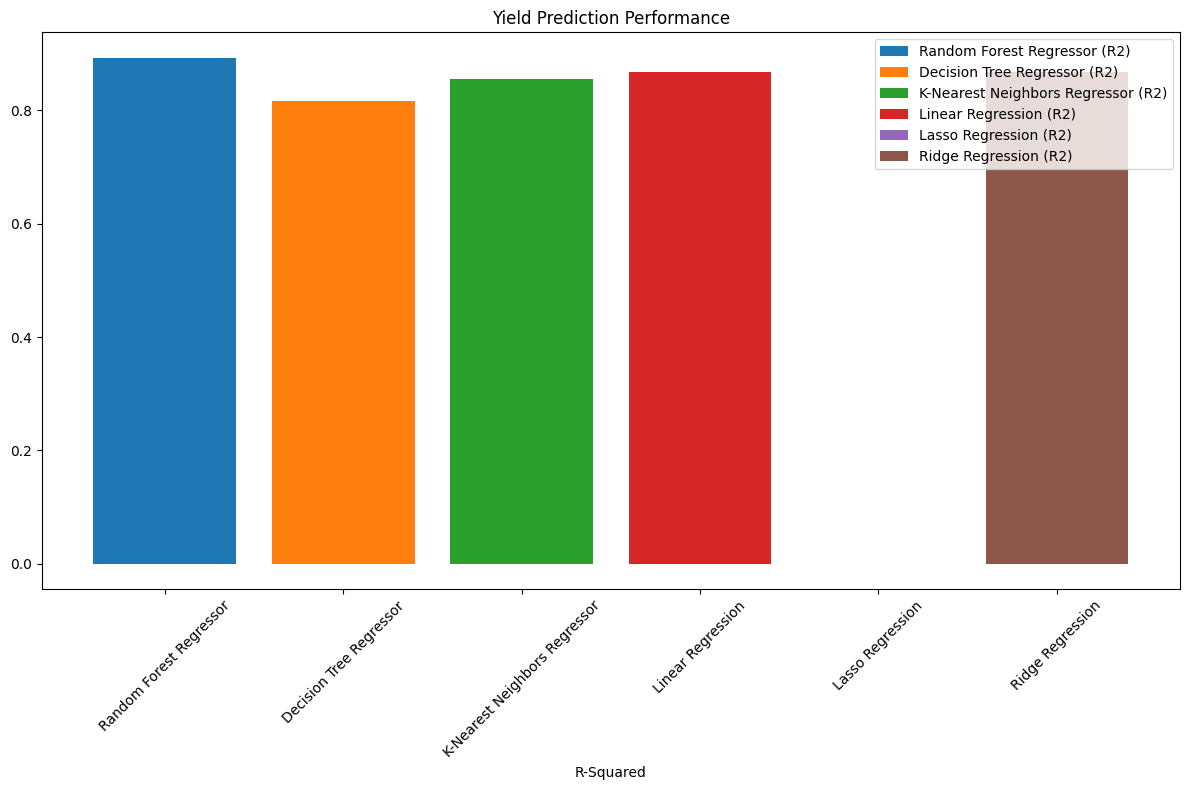

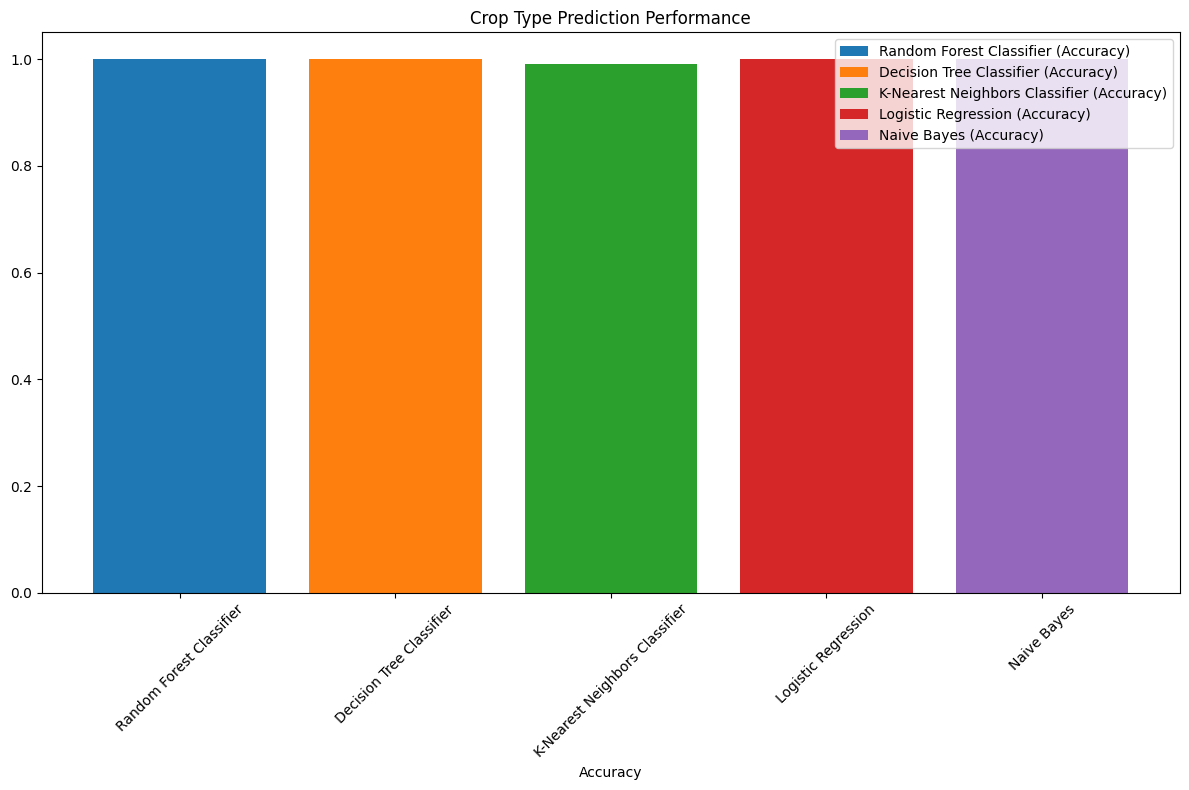

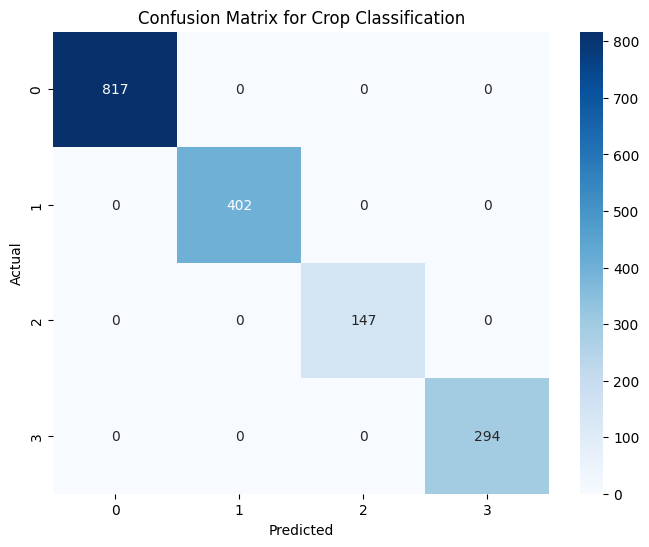

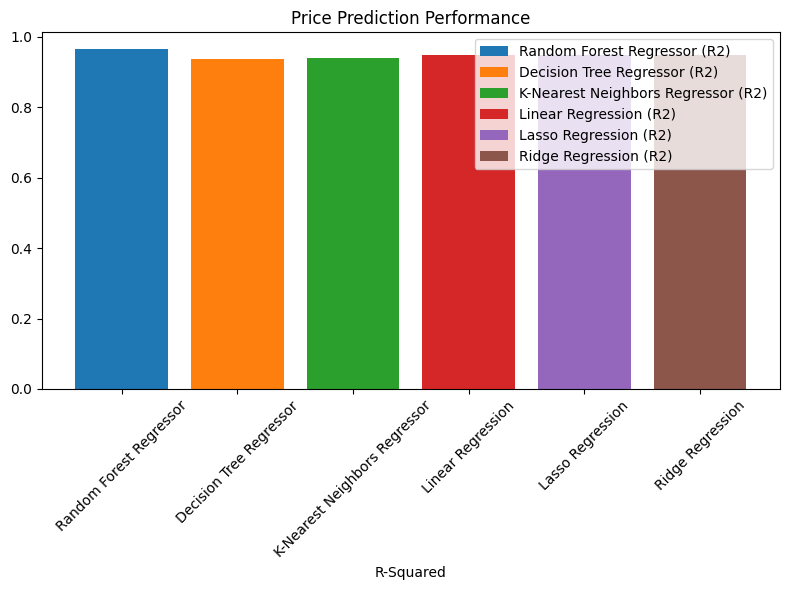

In [ ]:
# Results Visualization

# Yield Prediction
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for name, result in yield_results.items():
    plt.bar(name, result['test_r2'], label = f'{name} (R2)')
plt.xlabel('R-Squared')
plt.title('Yield Prediction Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Crop Type prediction
plt.figure(figsize=(12, 8))
for name, result in crop_results.items():
    plt.bar(name, result['test_accuracy'], label = f'{name} (Accuracy)')
plt.xlabel('Accuracy')
plt.title('Crop Type Prediction Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix for best classifier
best_clf = crop_results[max(crop_results, key=lambda x: crop_results[x]['test_accuracy'])]
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_crop_test, best_clf['predictions'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Crop Classification')
plt.show()

# Price Prediction
plt.figure(figsize=(8,6))
for name, result in price_results.items():
    plt.bar(name, result['test_r2'], label=f'{name} (R2)')
plt.xlabel('R-Squared')
plt.title('Price Prediction Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Select the best models based on your findings
crop_result = {
    'Decision Tree Classifier': crop_results['Decision Tree Classifier']
}
yield_result = {
    'Linear Regression': yield_results['Linear Regression']
}
price_result = {
    'Ridge Regression': price_results['Ridge Regression']
}

In [ ]:
yield_results['Linear Regression']

{'model': LinearRegression(),
 'train_rmse': np.float64(0.393958092275039),
 'test_rmse': np.float64(0.40143082111714185),
 'train_r2': 0.8749466777902828,
 'test_r2': 0.8684468636069709,
 'train_mae': 0.293672914332953,
 'test_mae': 0.2973001774345354,
 'cv_scores_mean': np.float64(0.8670176016906472),
 'cv_scores_std': np.float64(0.006943386719839488)}

In [ ]:
# Verify that the models are fitted before saving
crop_model = crop_result['Decision Tree Classifier']['model']
if not hasattr(crop_model, 'tree_'):
    raise ValueError("DecisionTreeClassifier is not fitted properly!")
print("DecisionTreeClassifier is fitted.")

yield_model = yield_result['Linear Regression']['model']
# LinearRegression does not have an 'estimators_' attribute; check for 'coef_' instead
if not hasattr(yield_model, 'coef_'):
    raise ValueError("Linear Regression is not fitted properly!")
print("LinearRegression is fitted.")  # Corrected the print statement

price_model = price_result['Ridge Regression']['model']
# Check for 'coef_' attribute in Ridge Regression instead of 'n_samples_fit_'
if not hasattr(price_model, 'coef_'):
    raise ValueError("Ridge Regression is not fitted properly!")
print("Ridge Regression is fitted.")  # Corrected the print statement

DecisionTreeClassifier is fitted.
LinearRegression is fitted.
Ridge Regression is fitted.


In [ ]:
# Test the price for a sample
sample_data = X_price_test.iloc[0].values.reshape(1, -1)
predicted_price = price_model.predict(sample_data)
print(f"Predicted Price: {predicted_price[0]}")
print(f"Actual Price: {y_price_test.iloc[0]}")

Predicted Price: 2143.2808745048783
Actual Price: 1954.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
# Test the crop
sample_data = X_crop_test.iloc[0].values.reshape(1, -1)
predicted_crop = crop_model.predict(sample_data)
predicted_crop_label = label_encoder.inverse_transform(predicted_crop)[0]
print(f"Predicted Crop: {predicted_crop_label}")
print(f"Actual Crop: {label_encoder.inverse_transform([y_crop_test[0]])[0]}")

Predicted Crop: Ragi
Actual Crop: Ragi


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
yield_model = LinearRegression()  # Create a new instance of the model
yield_model.fit(X_yield_train, y_yield_train)

LinearRegression()

In [ ]:
# Assuming 'merged_df_encoded' is the DataFrame with all features
# and 'Yield_t_ha' is the target variable

# Ensure consistent columns between train and test sets
train_cols = X_yield_train.columns.tolist()
test_cols = X_yield_test.columns.tolist()

# Find missing columns in test set
missing_cols = list(set(train_cols) - set(test_cols))

# If there are missing columns, add them to the test set with a default value (e.g., 0)
for col in missing_cols:
    X_yield_test[col] = 0  # or any other suitable default value

# Reorder columns in test set to match train set
X_yield_test = X_yield_test[train_cols]

# Print missing columns for debugging
print("Missing columns in test set:", missing_cols)

# Now proceed with prediction
sample_data = X_yield_test.iloc[0].values.reshape(1, -1)
predicted_yield = yield_model.predict(sample_data)
print(f"Predicted Yield: {predicted_yield[0]}")
print(f"Actual Yield: {y_yield_test.iloc[0]}")

Missing columns in test set: []
Predicted Yield: 1.9753919647450988
Actual Yield: 1.8402670573440745


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Save this yield model
yield_result['Linear Regression']['model'] = yield_model

In [ ]:
# Save the results dictionaries to Google Drive
import pickle
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/gdrive')
# Save all artifacts to Google Drive
save_dir = '/content/gdrive/My Drive/FarmPredictionModels/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
feature_names_path = os.path.join(save_dir, 'feature_names.pkl')
with open(feature_names_path, 'wb') as f:
    pickle.dump(feature_names, f)

# Save scalers
scalers = {
    'scaler_crop': scaler_crop,
    'scaler_yield': scaler_yield,
    'scaler_price': scaler_price,
    'scaler_soil': scaler_soil
}
scalers_path = os.path.join(save_dir, 'scalers.pkl')
with open(scalers_path, 'wb') as f:
    pickle.dump(scalers, f)

# Debug: Load and verify the saved feature_names.pkl
with open(feature_names_path, 'rb') as f:
    loaded_feature_names = pickle.load(f)
    print("Loaded Crop features:", loaded_feature_names['crop_features'])
    print("Loaded Yield features:", loaded_feature_names['yield_features'])
    print("Loaded Price features:", loaded_feature_names['price_features'])
    if 'Yield_t_ha' not in loaded_feature_names['price_features']:
        raise ValueError("Yield_t_ha is missing from loaded feature_names['price_features']. Check the saving process.")

Loaded Crop features: ['Year', 'Area_ha', 'Temperature_C', 'Rainfall_mm', 'Humidity_percent', 'Soil_pH', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg', 'State_Karnataka', 'State_Kerala', 'State_Tamil Nadu', 'State_Telangana', 'District_Alappuzha', 'District_Alluri Sitharama Raju', 'District_Anakapalli', 'District_Anantapur', 'District_Annamayya', 'District_Ariyalur', 'District_Bagalkot', 'District_Ballari', 'District_Bapatla', 'District_Belagavi', 'District_Bengaluru Rural', 'District_Bengaluru Urban', 'District_Bhadradri Kothagudem', 'District_Bidar', 'District_Chamarajanagar', 'District_Chengalpattu', 'District_Chennai', 'District_Chikkaballapura', 'District_Chikkamagaluru', 'District_Chitradurga', 'District_Chittoor', 'District_Coimbatore', 'District_Cuddalore', 'District_Dakshina Kannada', 'District_Davangere', 'District_Dharmapuri', 'District_Dharwad', 'District_Dindigul', 'District_East Godavari', 'District_Eluru', 'District_Ernakulam', 'District_Erode', 'District_Gadag

In [ ]:
# Define the directory in Google Drive to save the models
save_dir = '/content/gdrive/My Drive/FarmPredictionModels/'
os.makedirs(save_dir, exist_ok=True)

# Save model results
with open(os.path.join(save_dir, 'crop_result.pkl'), 'wb') as f:
    pickle.dump(crop_result, f)

# Save newly trained yield
with open(os.path.join(save_dir, 'yield_result.pkl'), 'wb') as f:
    pickle.dump(yield_result, f)

with open(os.path.join(save_dir, 'price_result.pkl'), 'wb') as f:
    pickle.dump(price_result, f)


# # Define feature names for each model
# feature_names = {
#     'crop_features': X_crop_train.columns.tolist(),
#     'yield_features': X_yield_train.columns.tolist(),
#     'price_features': X_price_train.columns.tolist()
# }

# # Save feature_names to a pickle file
# with open(save_dir + 'feature_names.pkl', 'wb') as f:
#     pickle.dump(feature_names, f)

# Save the categories to Google Drive
state_to_districts = merged_df.groupby('State')['District'].unique().to_dict()
categories = {
    'State': merged_df['State'].unique().tolist(),
    'District': merged_df['District'].unique().tolist(),
    'Crop': merged_df['Crop'].unique().tolist(),
    'Soil_Type': merged_df['Soil_Type'].unique().tolist(),
    'Month': merged_df['Month'].unique().tolist(),
    'State_to_Districts': state_to_districts
}
with open(os.path.join(save_dir, 'categories.pkl'), 'wb') as f:
    pickle.dump(categories, f)

In [ ]:
# Save label encoder
label_encoder_path = os.path.join(save_dir, 'label_encoder.pkl')
with open(label_encoder_path, 'wb') as f:
    pickle.dump(label_encoder, f)

In [ ]:
categories['State_to_Districts']

{'Andhra Pradesh': array(['Alluri Sitharama Raju', 'Anakapalli', 'Anantapur', 'Annamayya',
        'Bapatla', 'Chittoor', 'East Godavari', 'Eluru', 'Guntur',
        'Kadapa', 'Kakinada', 'Konaseema', 'Krishna', 'Kurnool', 'Nandyal',
        'Nellore', 'Palnadu', 'Parvathipuram Manyam', 'Prakasam',
        'Sri Balaji', 'Sri Sathya Sai', 'Srikakulam', 'Tirupati',
        'Visakhapatnam', 'Vizianagaram', 'West Godavari'], dtype=object),
 'Karnataka': array(['Bagalkot', 'Ballari', 'Belagavi', 'Bengaluru Rural',
        'Bengaluru Urban', 'Bidar', 'Chamarajanagar', 'Chikkaballapura',
        'Chikkamagaluru', 'Chitradurga', 'Dakshina Kannada', 'Davangere',
        'Dharwad', 'Gadag', 'Hassan', 'Haveri', 'Kalaburagi', 'Kodagu',
        'Kolar', 'Koppal', 'Mandya', 'Mysuru', 'Raichur', 'Ramanagara',
        'Shivamogga', 'Tumakuru', 'Udupi', 'Uttara Kannada',
        'Vijayanagara', 'Vijayapura', 'Yadgir'], dtype=object),
 'Kerala': array(['Alappuzha', 'Ernakulam', 'Idukki', 'Kannur', 'Kasa

In [ ]:
# Save soil model
soil_models_path = os.path.join(save_dir, 'soil_models.pkl')
with open(soil_models_path, 'wb') as f:
    pickle.dump(soil_models, f)